### HS4007: Computational Economics and Public Policy | Group Project | Group 1

Ethnic Segregation in London (1961-1980s) Post-War Immigration and Initial Settlement

### 1. Problem Statement 



We attempt to analyse the spatial seggregation in big citites, London for our case, how it changes over the time due to incumbent of the foreigners who settle. 

Wth reference to a wikipedia article about demography of london, we see that from 1997 onwards, London has experienced a drastic change in the composition of the city's population. In 1991, 21.7% of the city was foreign born but by 2011 this had risen to 36.7%.
This population data is in the form of races ex. Asian, White, Black etc. 
We are trying to find how, over the period of time the demograpy a region changes due to incumbent of new groups in a particular city 

We collected and analyzed census data for London from 2001, 2011, and 2021 from official London and European sources to inform our urban segregation model. By aligning the model’s parameters and functions with actual data from London, we can compare the simulated outcomes with real-world patterns, enhancing the model’s accuracy and applicability. This model can help predict future segregation trends based on projected population data, supporting informed public policy planning.

While built on London’s census data, the model is adaptable to any city. Only the specific parameters—such as agent numbers and preferences—need adjustment to fit the population data of the city of interest, as agent interactions follow similar dynamics across urban environments.

### 2. Python Code

This code was developed from scratch in Python, as no exact model was available to fully address the problem statement.

References:
- [Schelling Segregation Model in Streamlit](https://adilmoujahid.com/posts/2020/05/streamlit-python-schelling/)
- [Schelling's Model of Racial Segregation](https://towardsdatascience.com/schellings-model-of-racial-segregation-4852fad06c13)

While simplified models were referenced, including examples from class and other online sources, AI tools like ChatGPT were instrumental in accurately coding the specific content required.


### 3. Modifications

The model was developed based on the simplified Schelling model presented in class, with the following key enhancements:

**a. Addition of New Agent Types Over Time**

To simulate the gradual arrival of new demographic groups, agents are introduced at regular intervals. For example, Arabs were classified as a distinct group only after the 2011 census, while earlier data grouped all Asians together. Starting in 2001, Asian groups were further specified as Asian Indian, Asian Bangladeshi, Asian Pakistani, etc., to reflect a more diverse representation.

**b. Adjusted Tolerance/Reduced Satisfaction Threshold in Specific Areas**

Our data reveals that a higher concentration of immigrant populations settled in London’s more urbanized boroughs, suggesting that people tolerate reduced living conditions in exchange for job access and urban amenities. By lowering the satisfaction threshold for certain areas (e.g., the "City of London"), we accurately modeled the population density growth and community mixing in these parts.

**c. Increase in Agent Count**

Each agent type represents an ethnic group, while the number of agents models population size. This allows the model to represent population growth over time.

**d. Using London’s Map as a Grid**

Instead of a generic grid, we used London’s actual map as a .geojson file, enhancing the model’s visual and comparative accuracy. The .geojson file was sourced from:
https://github.com/radoi90/housequest-data/blob/master/london_boroughs.geojson


### 4. Interpretation of Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns   
import geopandas as gpd
import random
from shapely.geometry import Point
import matplotlib.patches as mpatches

In [2]:
data = pd.read_csv('2011_census.csv') # File specific to the data used. Files availible in the folder. This are the census reports of 2001, 2011, 2021. 
data.head()

local authority name  All usual residents  White British  White Irish  \
0        City of London                 7375           4243          180   
1  Barking and Dagenham                 3325            496           25   
2  Barking and Dagenham                 8926           5156           79   
3  Barking and Dagenham                 5793           1961           26   
4  Barking and Dagenham                 7654           3576          137   

   White Gypsy/Irish Traveller  White Other  Mixed White and Asian  \
0                            3         1373                    111   
1                            4          494                     35   
2                            3          700                     54   
3                           10          432                     35   
4                            0          730                     31   

   Mixed White and Black African  Mixed White and Black Caribbean  \
0                             37                               38   
1                             50                               26   
2                             94                               86   
3                             91                               96   
4                             98                              107   

   Mixed Other  Asian Bangladeshi  Asian Chinese  Asian Indian  \
0          103                232            263           216   
1           35                144            104           701   
2           62                273             71           173   
3           82                298             45           157   
4           60                187             43           247   

   Asian Pakistani  Asian Other  Black African  Black Caribbean  Black Other  \
0               16          213             98               46           49   
1              315          161            503               81           40   
2              104          230           1455              206           94   
3              167          183           1684              236          174   
4               93          123           1598              271          191   

   Other Arab  Other Any other  
0          69               85  
1          23               89  
2          31               55  
3          30               88  
4          22              139

In [3]:
#Preprossing to get borrow wise data. Individual Wards are grouped
grouped_data = data.groupby(data.columns[0]).sum()
grouped_data_copy = grouped_data.copy()
grouped_data.head()

All usual residents  White British  White Irish  \
local authority name                                                    
Barking and Dagenham               185911          91951         1729   
Barnet                             356385         162116         8685   
Bexley                             231999         179250         2596   
Brent                              311215          55887        12323   
Bromley                            309393         239480         4464   

                      White Gypsy/Irish Traveller  White Other  \
local authority name                                             
Barking and Dagenham                          182        14526   
Barnet                                        152        57599   
Bexley                                        623         7493   
Brent                                         320        44353   
Bromley                                       579        16349   

                      Mixed White and Asian  Mixed White and Black African  \
local authority name                                                         
Barking and Dagenham                   1245                           2127   
Barnet                                 5883                           3111   
Bexley                                 1369                            984   
Brent                                  3643                           2821   
Bromley                                3016                           1338   

                      Mixed White and Black Caribbean  Mixed Other  \
local authority name                                                 
Barking and Dagenham                             2668         1836   
Barnet                                           3099         5078   
Bexley                                           1676         1367   
Brent                                            4294         5020   
Bromley                                          3896         2649   

                      Asian Bangladeshi  Asian Chinese  Asian Indian  \
local authority name                                                   
Barking and Dagenham               7701           1315          7437   
Barnet                             2218           8260         27919   
Bexley                              777           2512          7049   
Brent                              1749           3252         58018   
Bromley                            1265           2768          6216   

                      Asian Pakistani  Asian Other  Black African  \
local authority name                                                
Barking and Dagenham             8007         5133          28685   
Barnet                           5344        22181          19390   
Bexley                            733         4174          15951   
Brent                           14381        28587          24391   
Bromley                          1013         4805           9819   

                      Black Caribbean  Black Other  Other Arab  \
local authority name                                             
Barking and Dagenham             5228         3228         972   
Barnet                           4470         3571        5210   
Bexley                           2380         1291         303   
Brent                           23723        10519       11431   
Bromley                          6608         2256         870   

                      Other Any other  
local authority name                   
Barking and Dagenham             1941  
Barnet                          12105  
Bexley                           1471  
Brent                            6513  
Bromley                          2002

In [4]:
# Combining few categories into one 'Others' category 
grouped_data['Others'] = grouped_data['White Other'] + grouped_data['Asian Other'] + grouped_data['Black Other'] + grouped_data['Mixed Other'] + grouped_data['Other Any other'] + grouped_data['Other Arab']

In [5]:
grouped_data = grouped_data.drop(columns=['All usual residents','Black Other', 'White Other', 'Mixed Other', 'Asian Other','Other Any other', 'Other Arab' ])


In [6]:
grouped_data['Total_Population'] = grouped_data.sum(axis=1)
ethnic_columns = grouped_data.columns[:-1]  # All columns except 'Total Population'
data_percentage = grouped_data[ethnic_columns].div(grouped_data['Total_Population'], axis=0) * 100

# Data convered to percentages (these will be used for setting the ratios of agents in the model)
data_percentage


White British  White Irish  \
local authority name                                 
Barking and Dagenham        49.459688     0.930015   
Barnet                      45.488242     2.436930   
Bexley                      77.263264     1.118970   
Brent                       17.957105     3.959515   
Bromley                     77.403173     1.442825   
Camden                      43.994173     3.201020   
City of London              57.532203     2.440678   
Croydon                     47.261659     1.477804   
Ealing                      30.442542     3.081069   
Enfield                     40.468601     2.208269   
Greenwich                   52.299092     1.685674   
Hackney                     36.151085     2.118389   
Hammersmith and Fulham      44.926027     3.464110   
Haringey                    34.685888     2.743944   
Harrow                      30.883110     3.068776   
Havering                    83.302420     1.260401   
Hillingdon                  52.171897     2.171350   
Hounslow                    37.904436     1.881362   
Islington                   47.702750     3.948747   
Kensington and Chelsea      39.249921     2.341633   
Kingston upon Thames        63.105189     1.698589   
Lambeth                     39.015828     2.460431   
Lewisham                    41.482926     1.887004   
Merton                      48.403105     2.211818   
Newham                      16.726410     0.705227   
Redbridge                   34.503241     1.398010   
Richmond upon Thames        71.437663     2.548786   
Southwark                   39.729848     2.158997   
Sutton                      70.919647     1.692883   
Tower Hamlets               31.181497     1.520309   
Waltham Forest              36.010284     1.533374   
Wandsworth                  53.334658     2.496718   
Westminster                 35.247628     2.262058   

                        White Gypsy/Irish Traveller  Mixed White and Asian  \
local authority name                                                         
Barking and Dagenham                       0.097896               0.669675   
Barnet                                     0.042650               1.650715   
Bexley                                     0.268536               0.590089   
Brent                                      0.102820               1.170536   
Bromley                                    0.187141               0.974812   
Camden                                     0.075793               1.761855   
City of London                             0.040678               1.505085   
Croydon                                    0.064121               1.414509   
Ealing                                     0.088638               1.374781   
Enfield                                    0.109453               1.340963   
Greenwich                                  0.168921               0.927886   
Hackney                                    0.193282               1.225880   
Hammersmith and Fulham                     0.118904               1.452055   
Haringey                                   0.144748               1.467098   
Harrow                                     0.075715               1.429808   
Havering                                   0.067446               0.486456   
Hillingdon                                 0.125579               1.314565   
Hounslow                                   0.072057               1.334436   
Islington                                  0.079082               1.438025   
Kensington and Chelsea                     0.075008               1.904192   
Kingston upon Thames                       0.059972               1.562402   
Lambeth                                    0.064340               1.178908   
Lewisham                                   0.075393               1.104075   
Merton                                     0.108663               1.417126   
Newham                                     0.150007               0.869845   
Redbridge                  

In [7]:
ethnic_columns = ethnic_columns[:-1]
ethnic_columns


Index(['White British', 'White Irish', 'White Gypsy/Irish Traveller',
       'Mixed White and Asian', 'Mixed White and Black African',
       'Mixed White and Black Caribbean', 'Asian Bangladeshi', 'Asian Chinese',
       'Asian Indian', 'Asian Pakistani', 'Black African', 'Black Caribbean'],
      dtype='object')

<Figure size 1400x800 with 0 Axes>

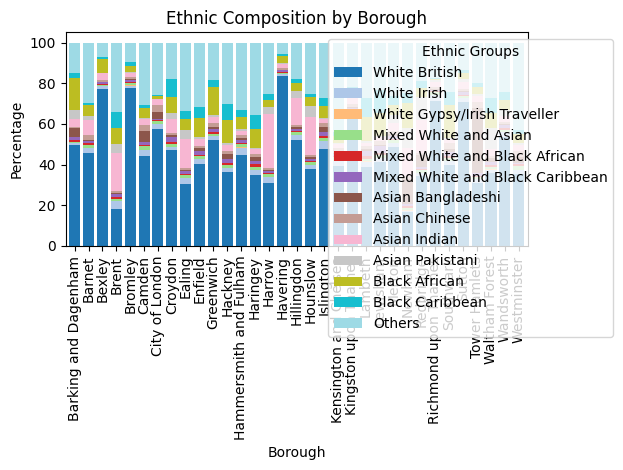

In [8]:
# Stack Plot
plt.figure(figsize=(14, 8))
data_percentage.plot(kind='bar', stacked=True, colormap='tab20', width=0.8)
plt.title("Ethnic Composition by Borough")
plt.xlabel("Borough")
plt.ylabel("Percentage")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title="Ethnic Groups")
plt.tight_layout()
plt.show()

While 'White British' is often prominent, other ethnicities contribute significantly, especially in inner-city boroughs like the City of London and Westminster, indicating London's multicultural population distribution.

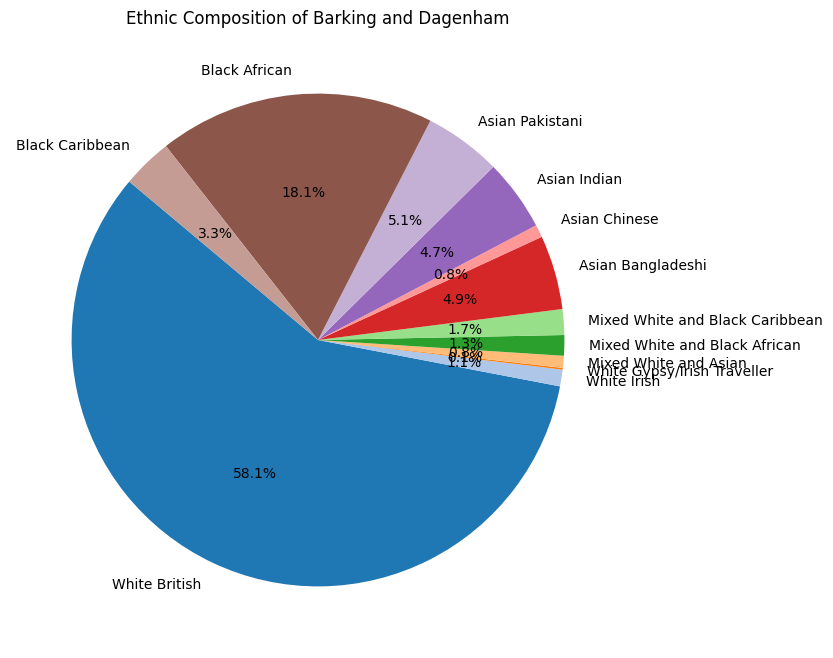

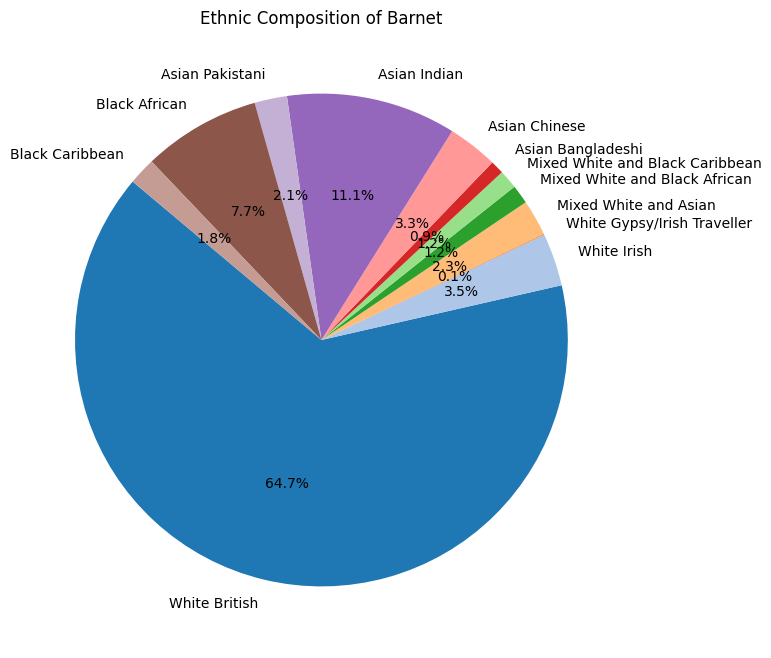

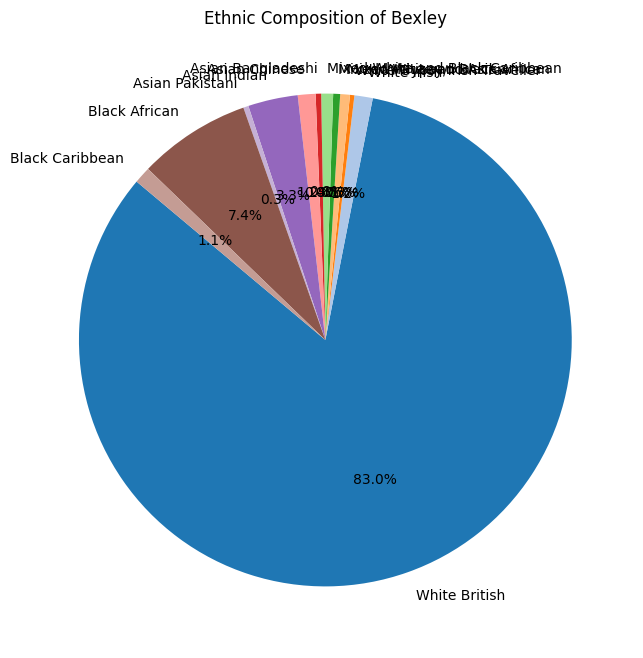

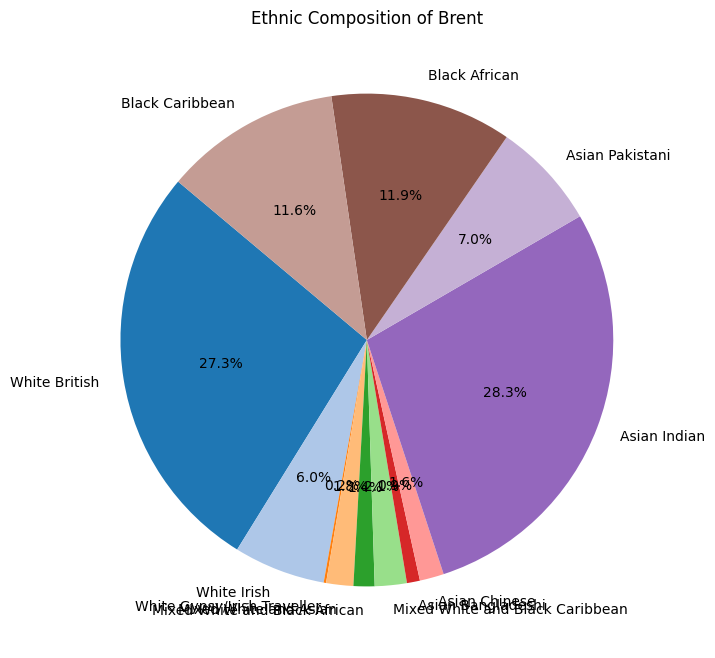

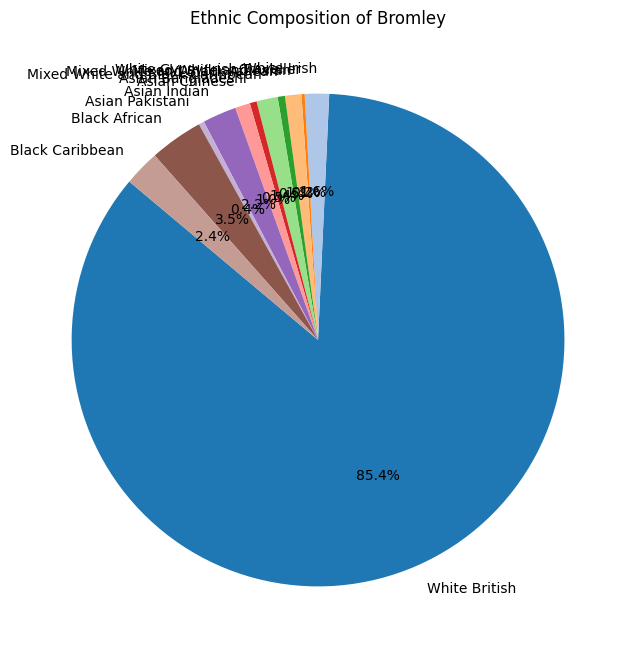

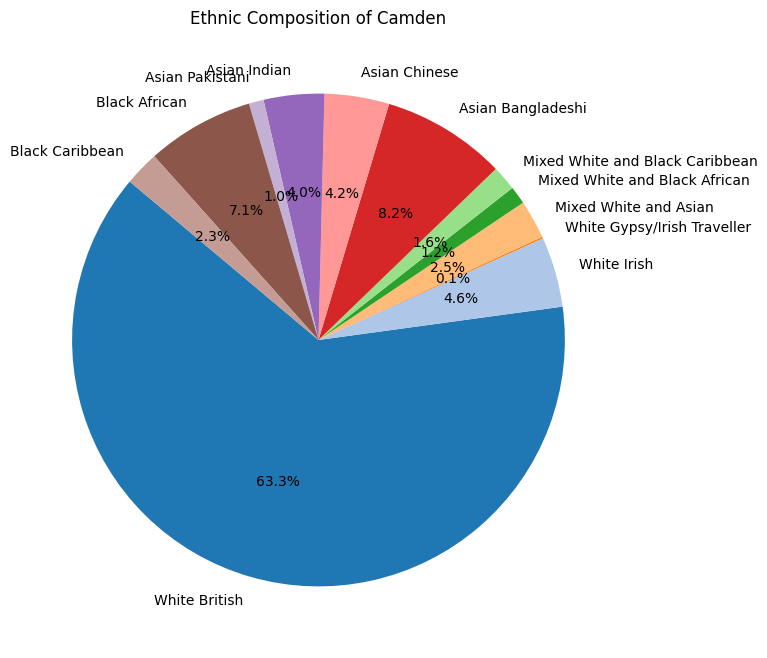

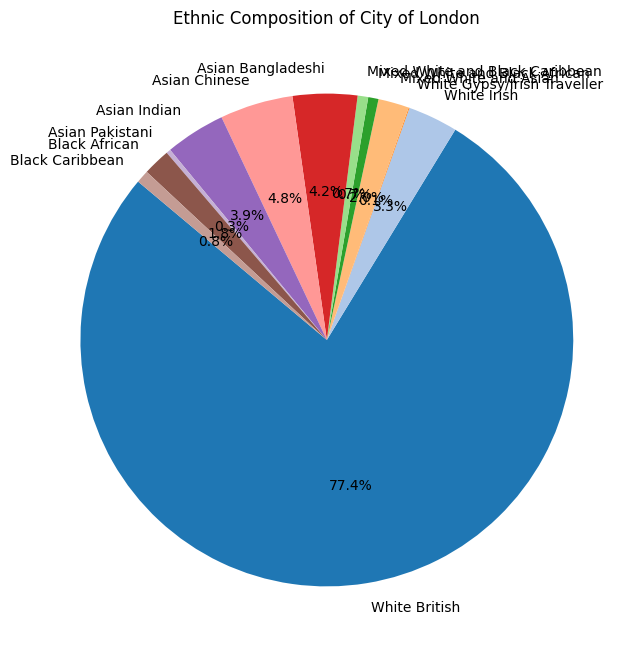

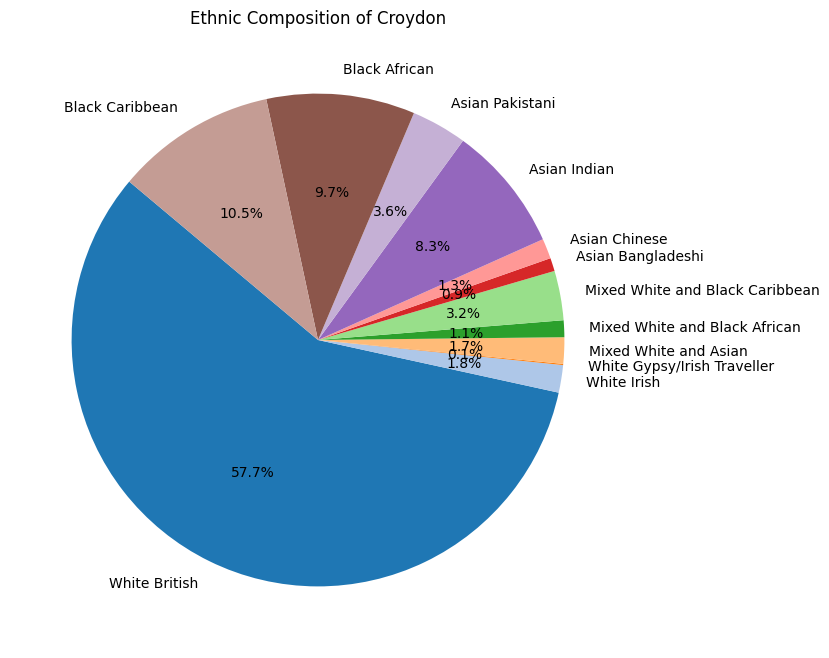

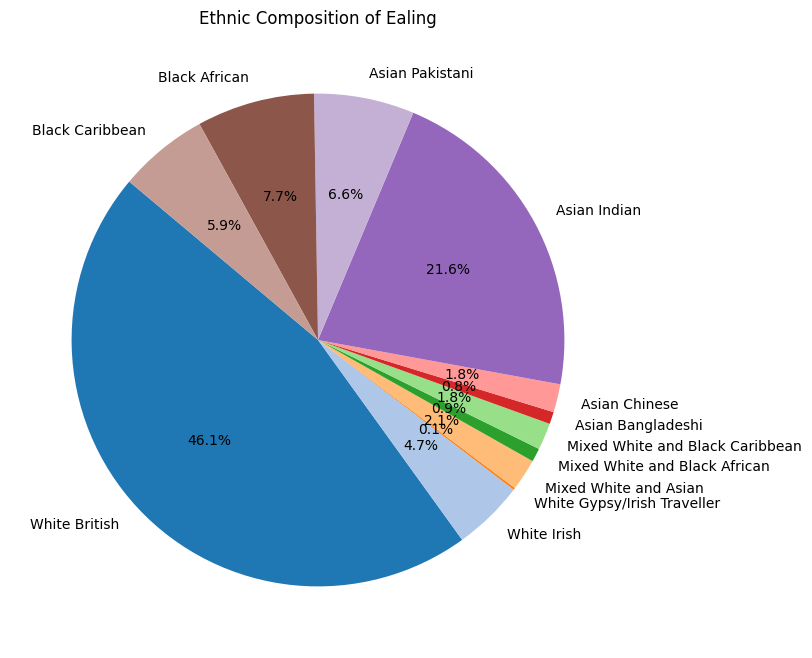

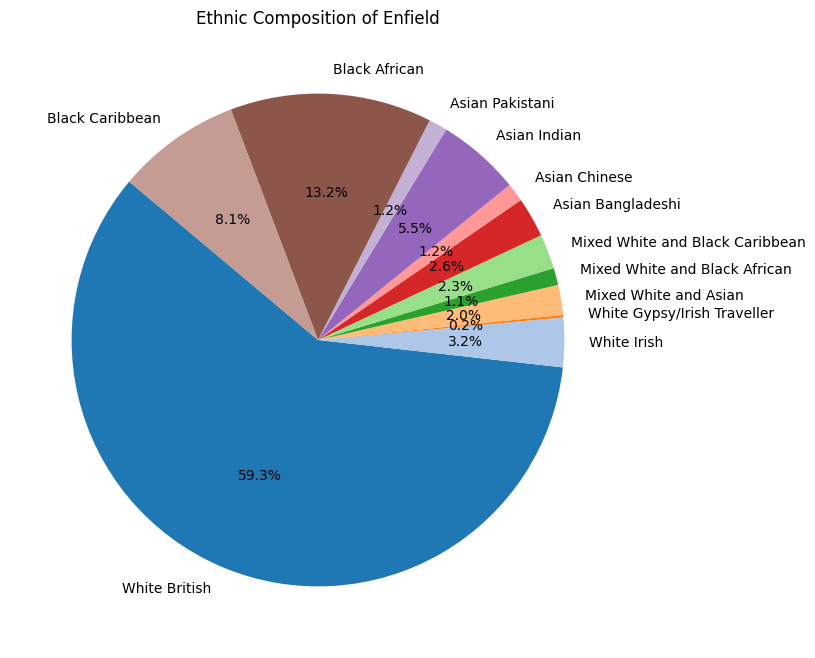

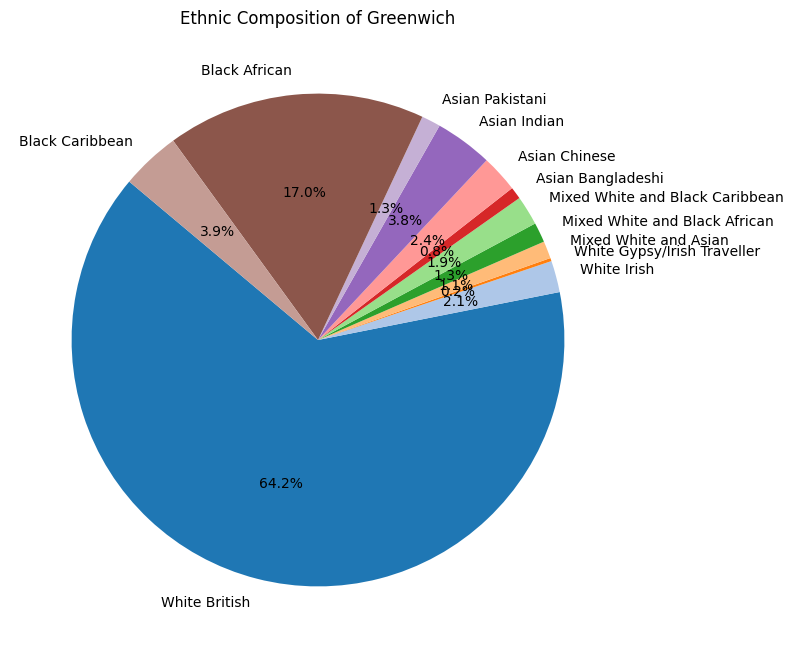

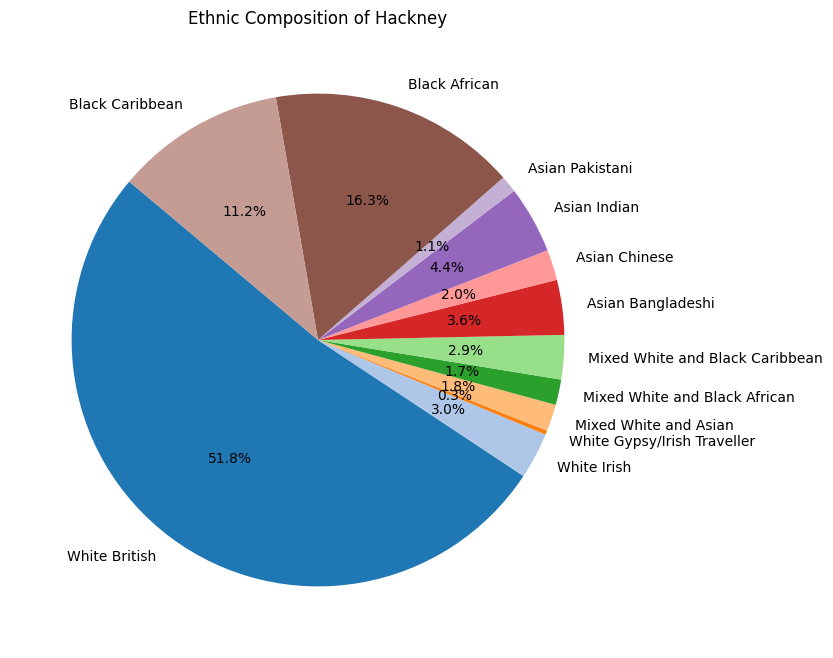

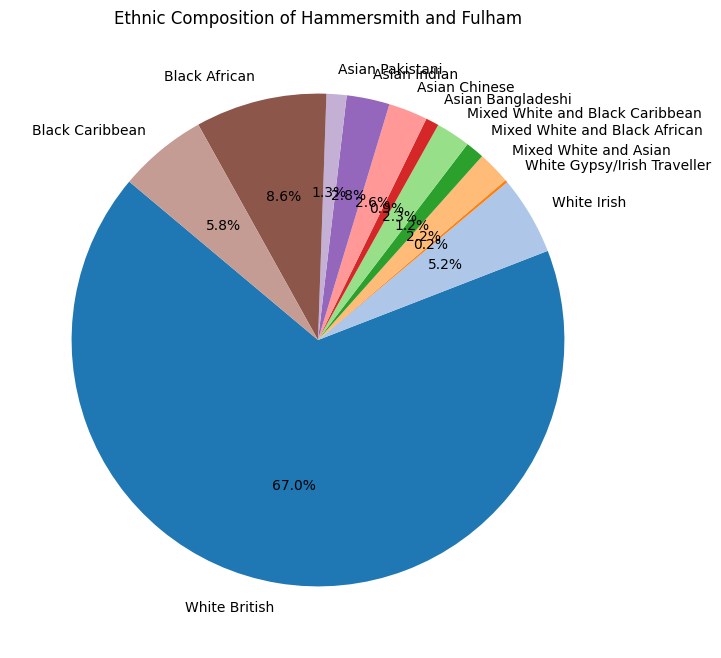

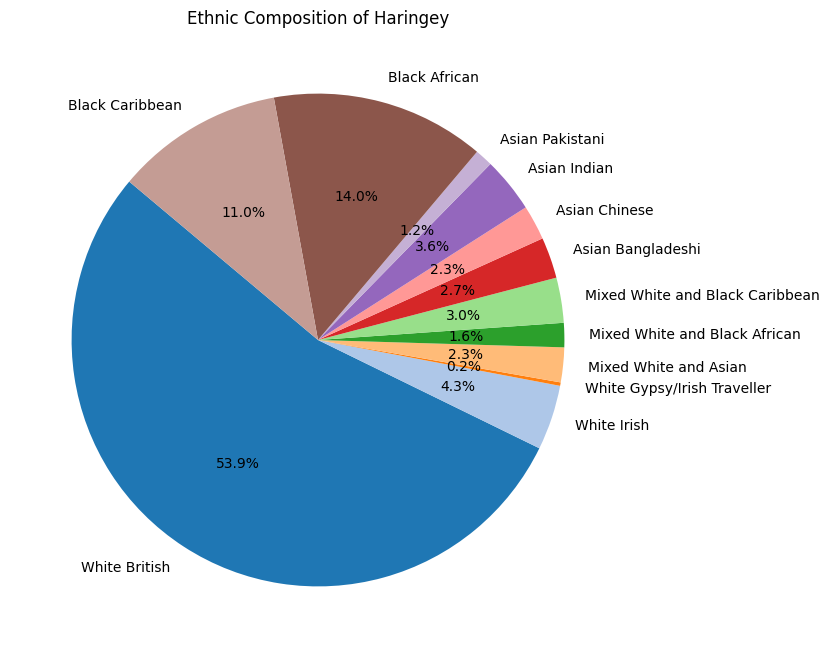

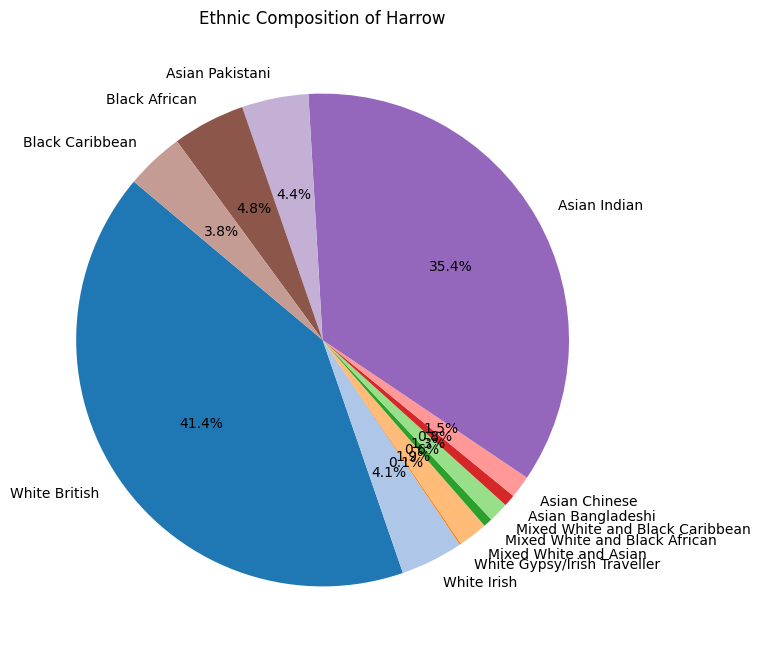

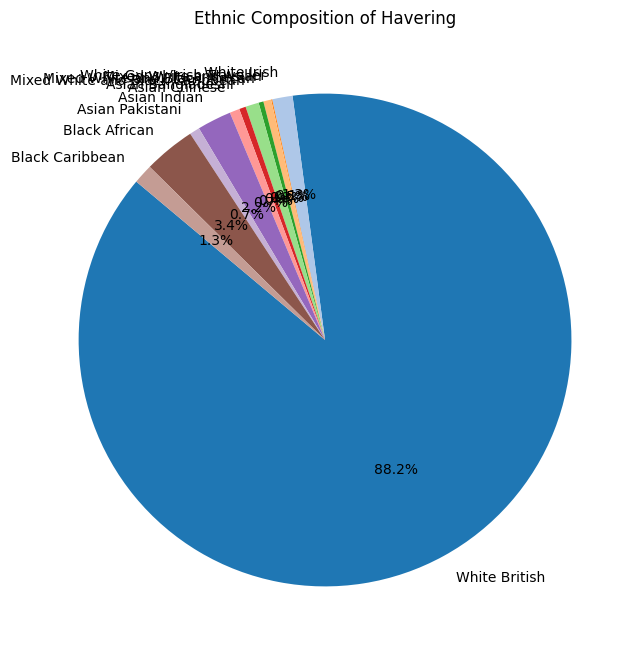

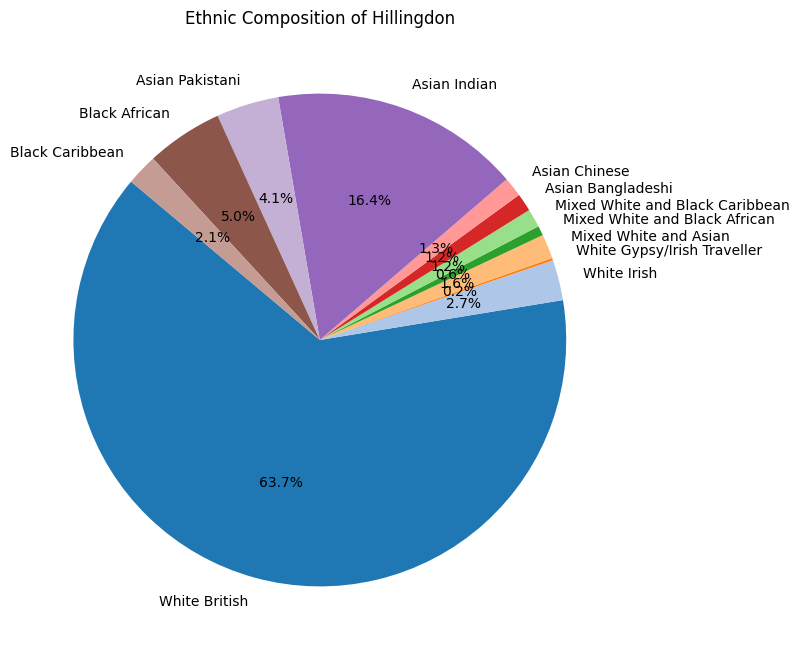

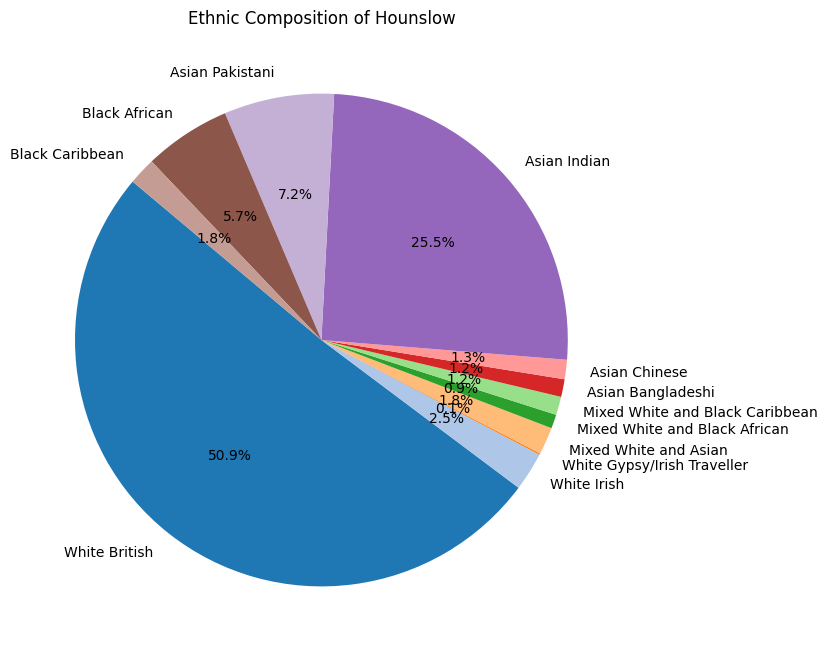

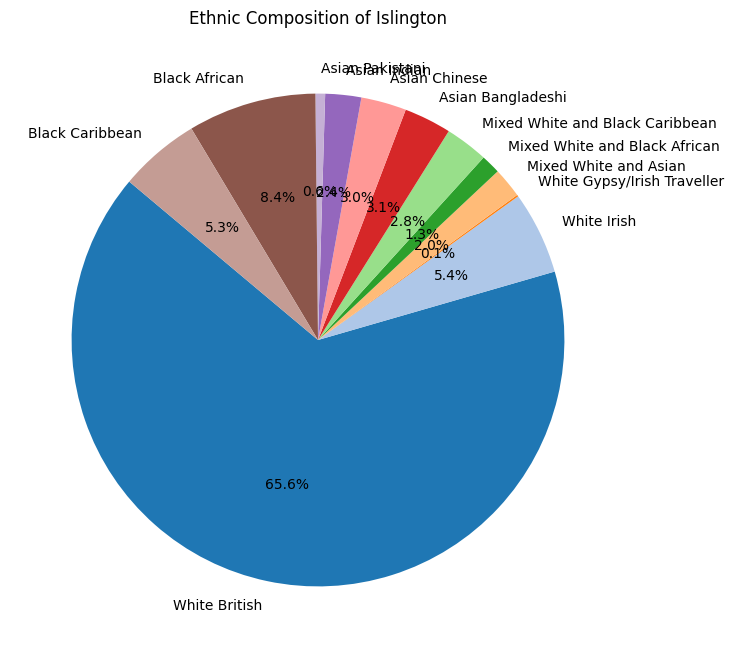

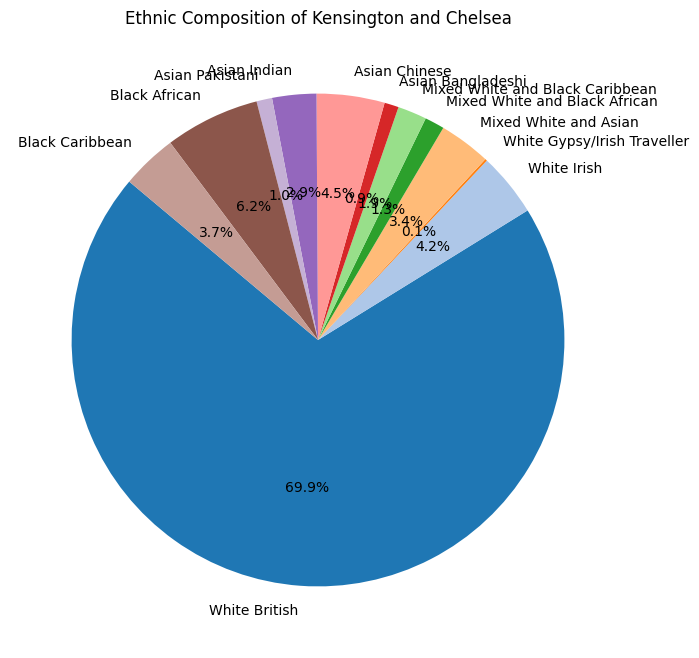

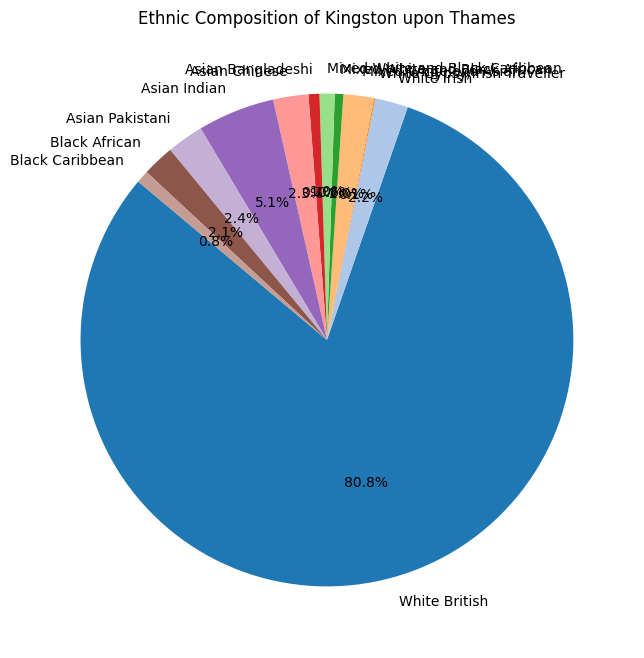

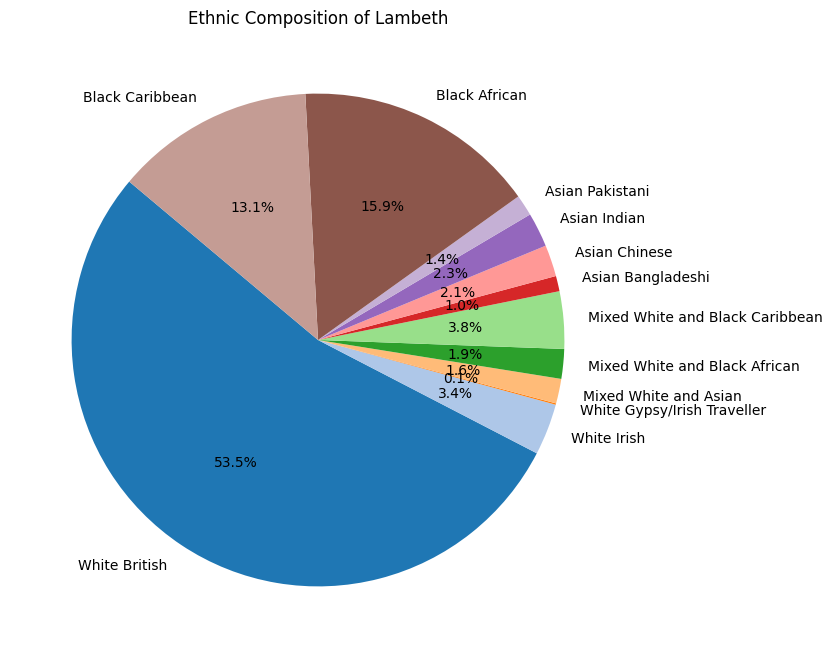

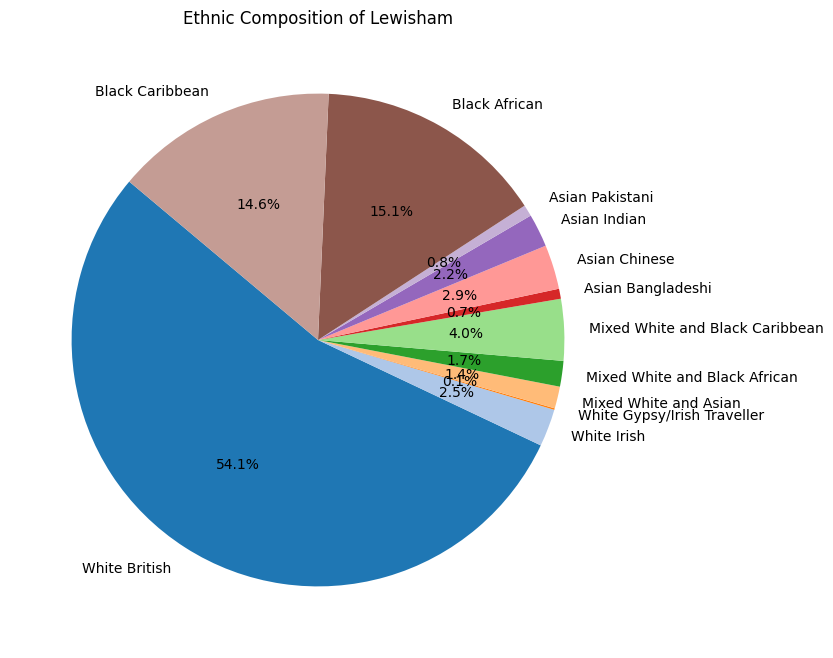

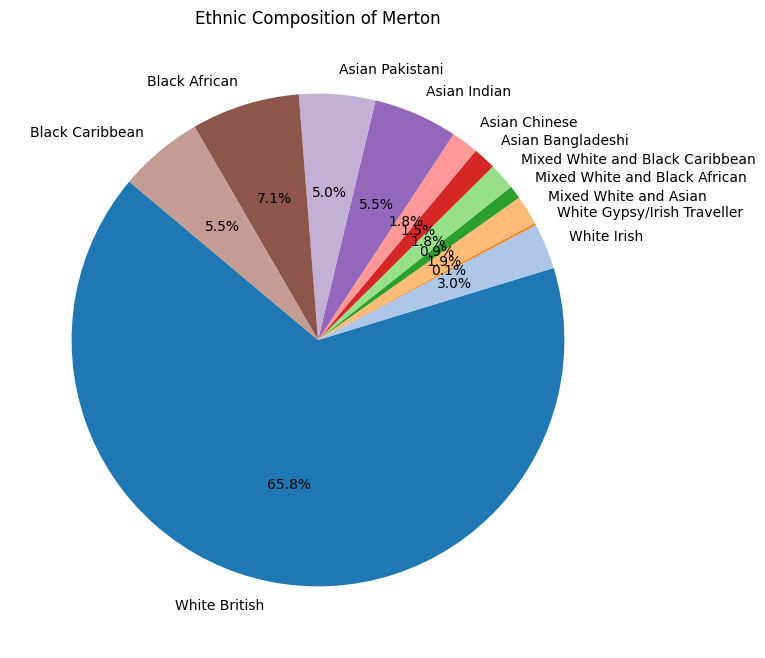

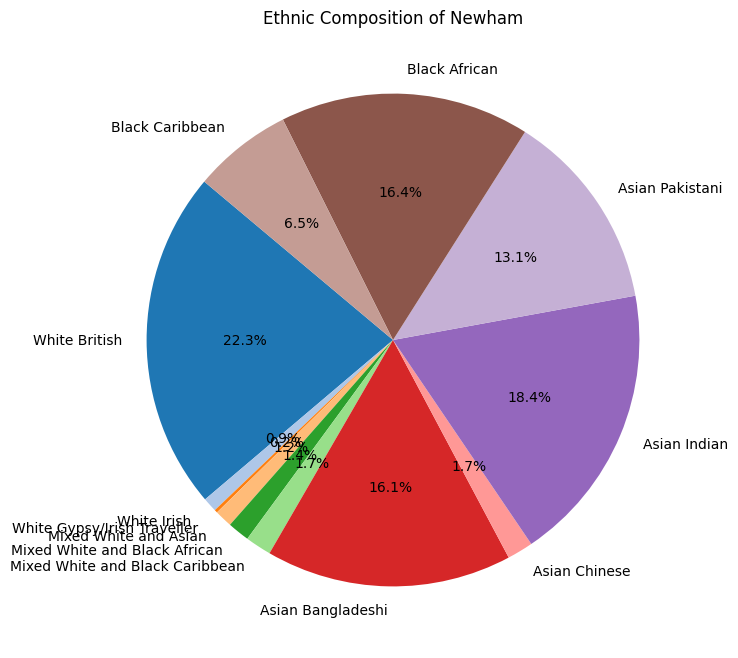

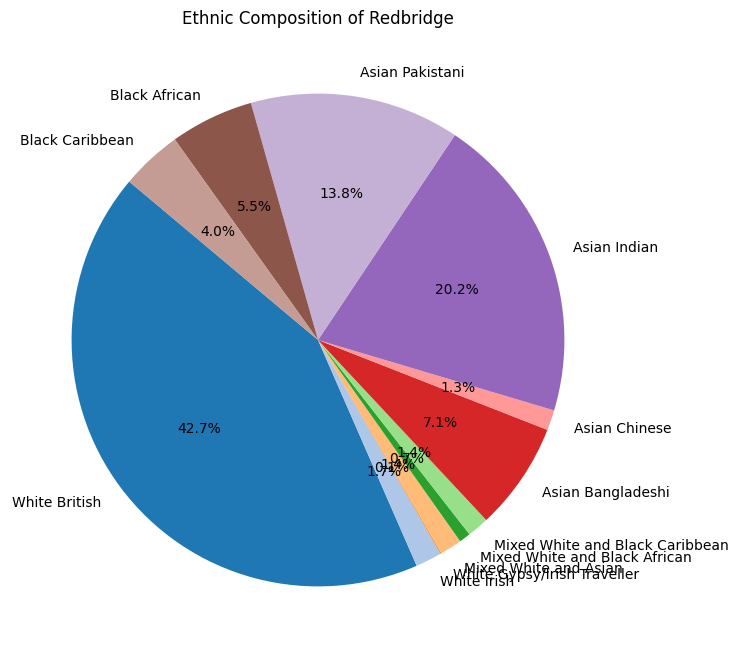

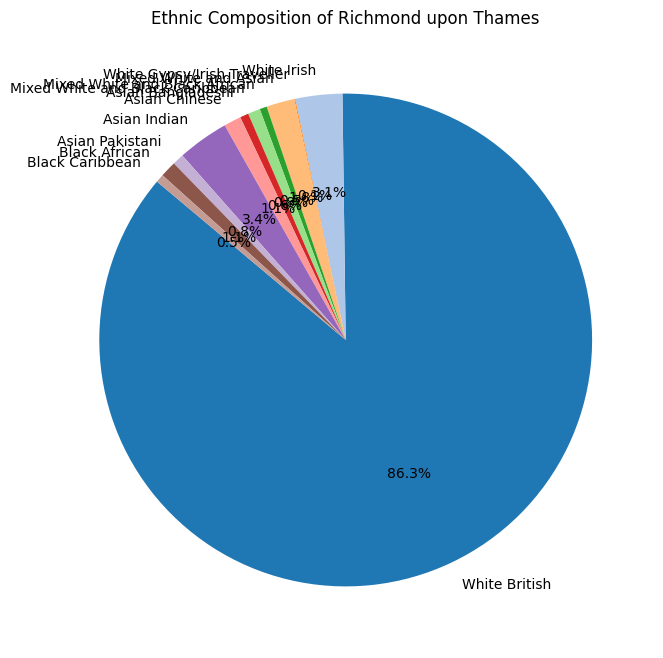

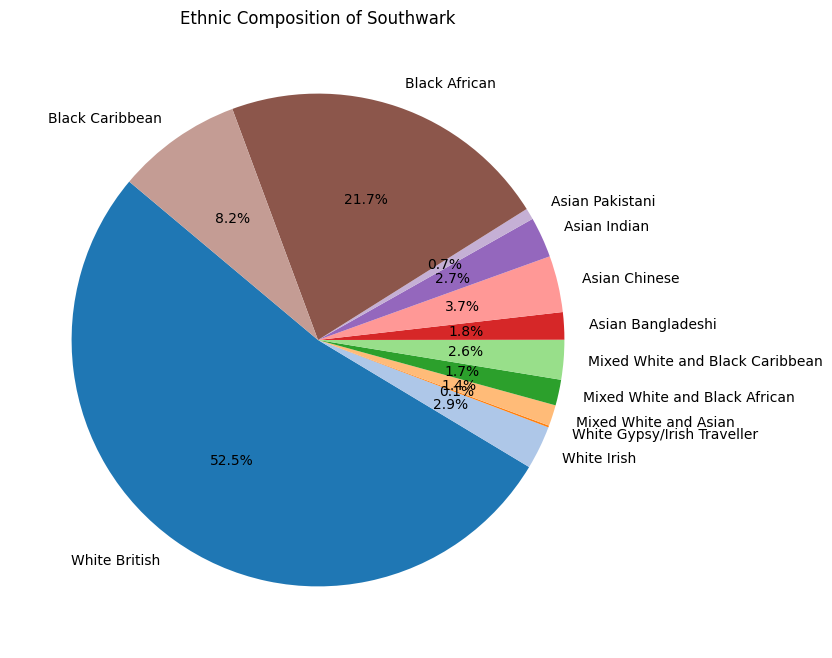

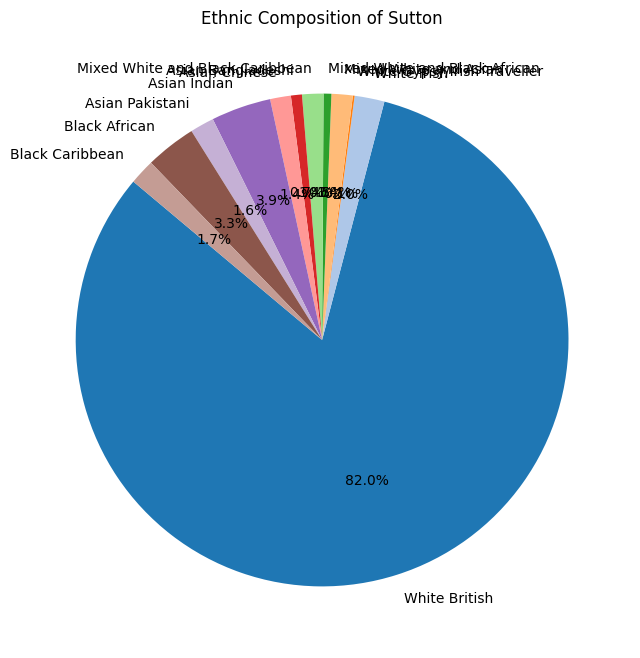

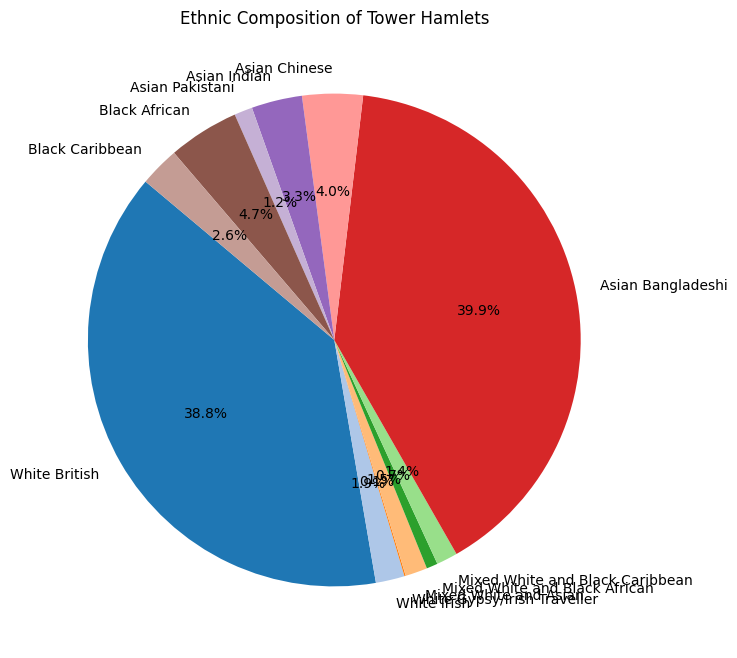

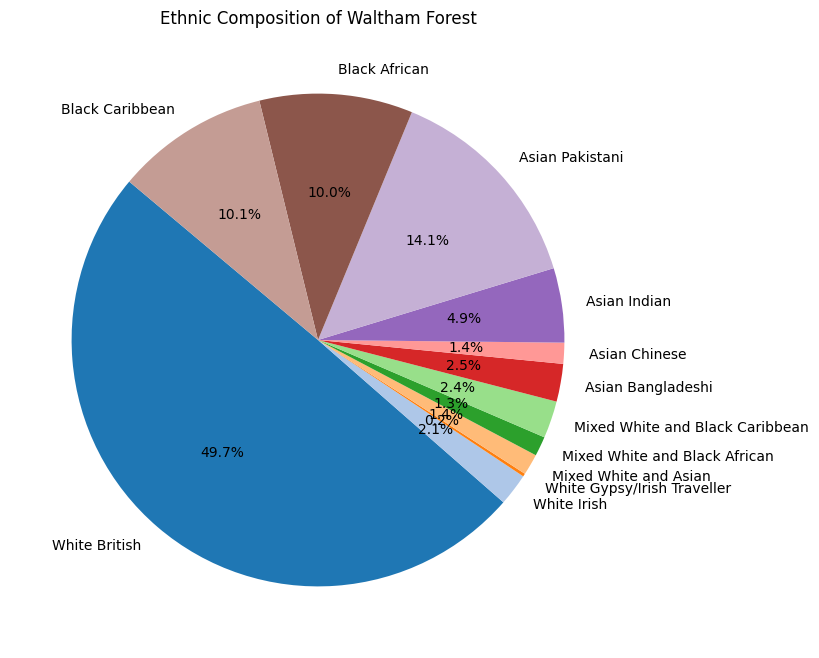

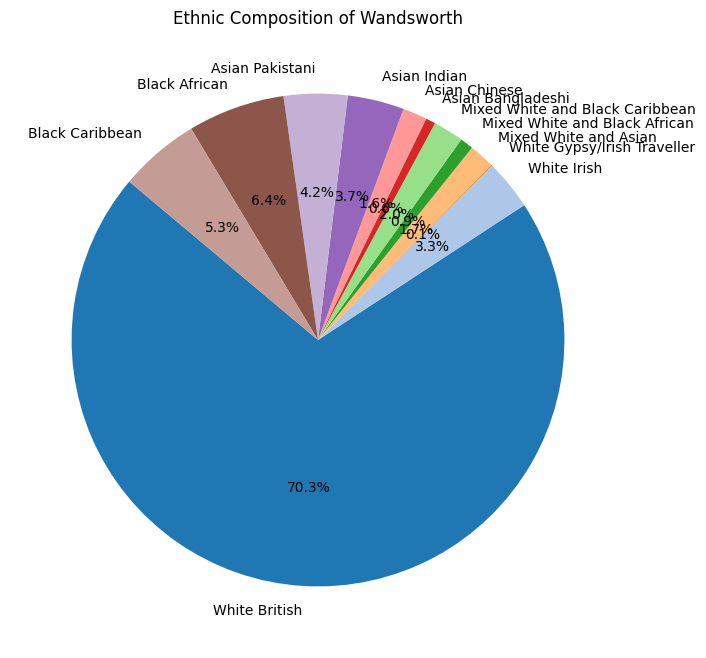

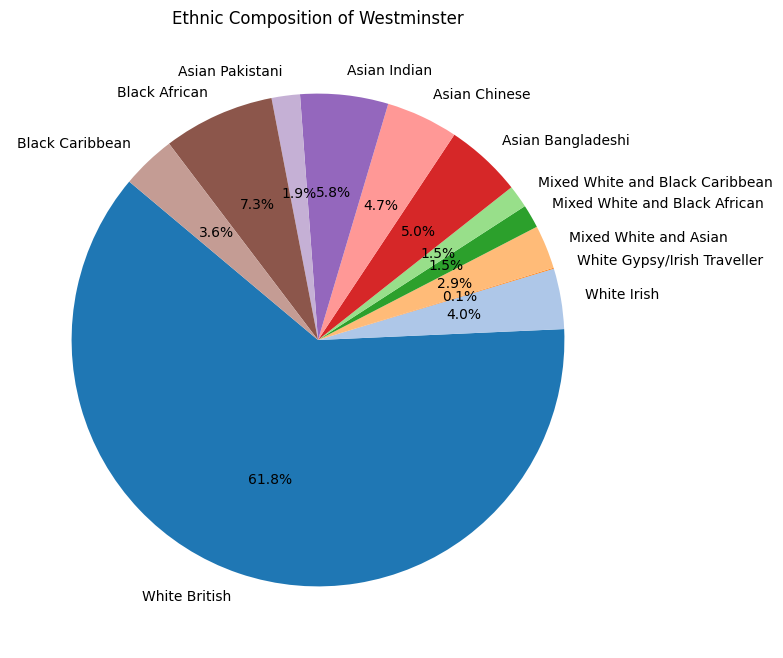

In [9]:
# Borough wise Pie Chart 
for borough in grouped_data.index.to_list() :

    borough_data = grouped_data.loc[borough, ethnic_columns]

    plt.figure(figsize=(8, 8))
    plt.pie(borough_data, labels=ethnic_columns, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("tab20", len(ethnic_columns)))
    plt.title(f"Ethnic Composition of {borough}")
    plt.show()

<Figure size 1000x1000 with 0 Axes>

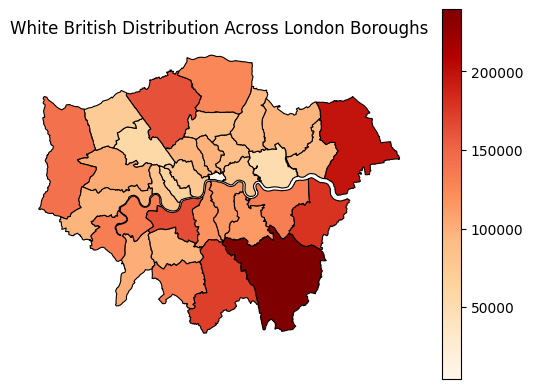

<Figure size 1000x1000 with 0 Axes>

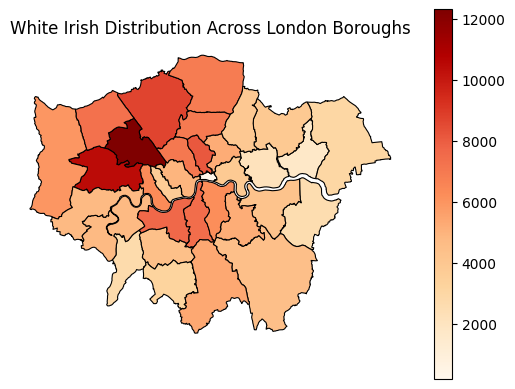

<Figure size 1000x1000 with 0 Axes>

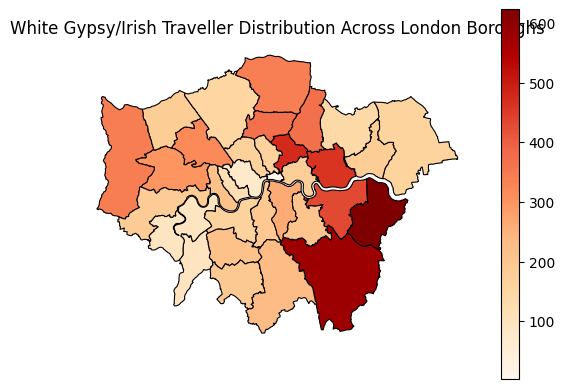

<Figure size 1000x1000 with 0 Axes>

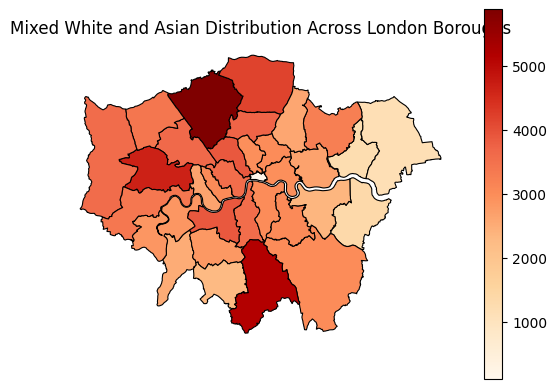

<Figure size 1000x1000 with 0 Axes>

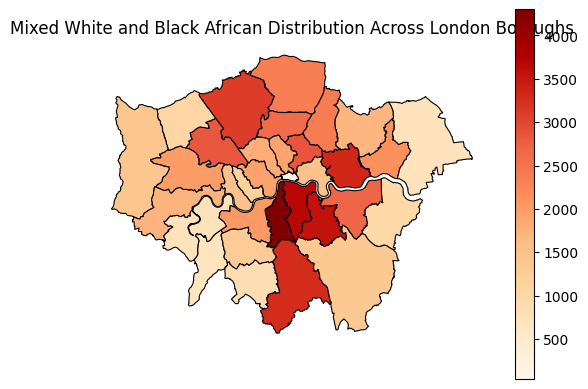

<Figure size 1000x1000 with 0 Axes>

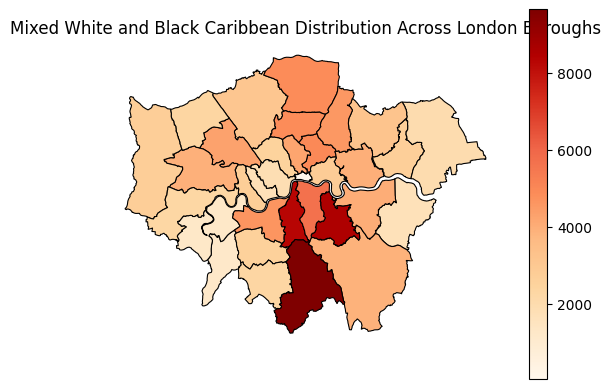

<Figure size 1000x1000 with 0 Axes>

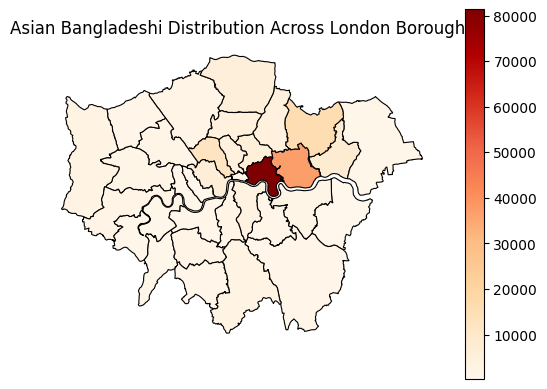

<Figure size 1000x1000 with 0 Axes>

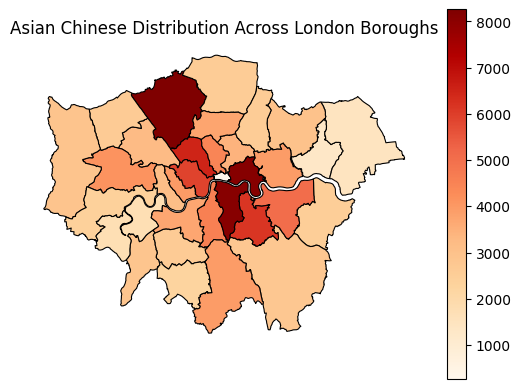

<Figure size 1000x1000 with 0 Axes>

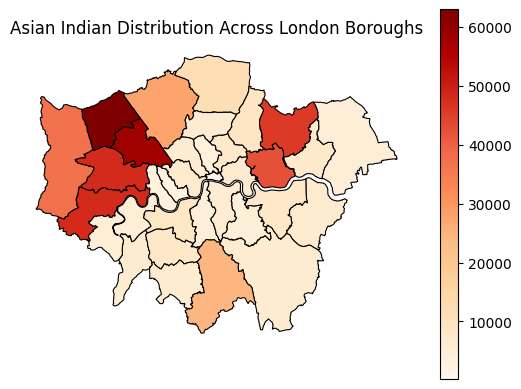

<Figure size 1000x1000 with 0 Axes>

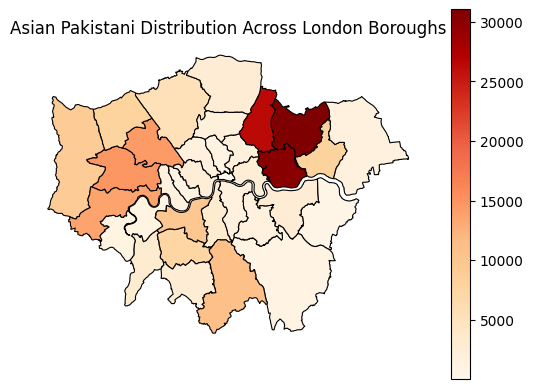

<Figure size 1000x1000 with 0 Axes>

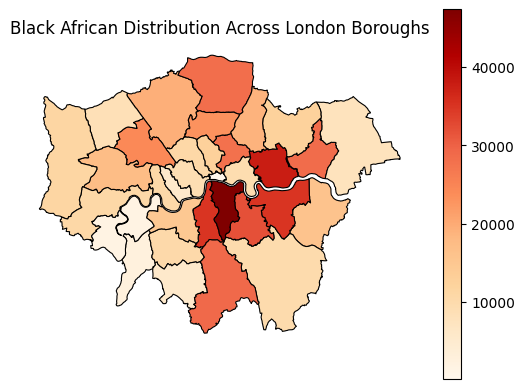

<Figure size 1000x1000 with 0 Axes>

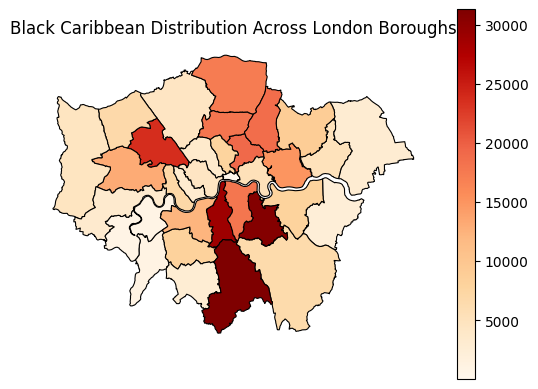

<Figure size 1000x1000 with 0 Axes>

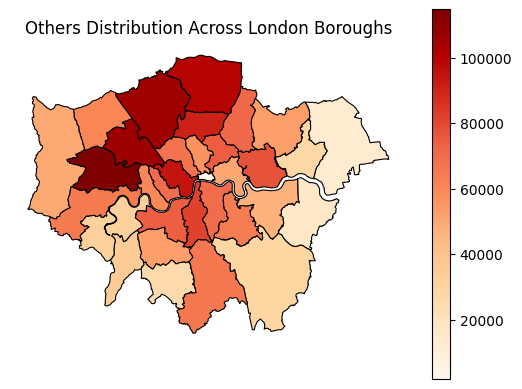

In [10]:
geo_df = gpd.read_file('london_421.geojson')


geo_df = geo_df.rename(columns={'name': 'local authority name'})  
merged_data = geo_df.merge(grouped_data, on='local authority name', how='left')


ethnic_columns = grouped_data.columns[:-1] 

#Plotting a map for each ethnic group distribution
for column in ethnic_columns:
    plt.figure(figsize=(10, 10))
    merged_data.plot(column=column, cmap='OrRd', linewidth=0.8, edgecolor='black', legend=True)
    plt.title(f"{column} Distribution Across London Boroughs")
    plt.axis('off')
    plt.show()


This shows distribution of each ethinic group in the London, as a individual chloropleth map

In [11]:
grouped_data

White British  White Irish  \
local authority name                                 
Barking and Dagenham            91951         1729   
Barnet                         162116         8685   
Bexley                         179250         2596   
Brent                           55887        12323   
Bromley                        239480         4464   
Camden                          96935         7053   
City of London                   4243          180   
Croydon                        171738         5370   
Ealing                         103034        10428   
Enfield                        126449         6900   
Greenwich                      133131         4291   
Hackney                         89030         5217   
Hammersmith and Fulham          81990         6322   
Haringey                        88423         6995   
Harrow                          73827         7336   
Havering                       197615         2990   
Hillingdon                     142915         5948   
Hounslow                        96264         4778   
Islington                       98323         8139   
Kensington and Chelsea          62270         3715   
Kingston upon Thames           101015         2719   
Lambeth                        118248         7457   
Lewisham                       114446         5206   
Merton                          96661         4417   
Newham                          51515         2172   
Redbridge                       96253         3900   
Richmond upon Thames           133582         4766   
Southwark                      114534         6224   
Sutton                         134853         3219   
Tower Hamlets                   79230         3863   
Waltham Forest                  92998         3960   
Wandsworth                     163739         7665   
Westminster                     77334         4963   

                        White Gypsy/Irish Traveller  Mixed White and Asian  \
local authority name                                                         
Barking and Dagenham                            182                   1245   
Barnet                                          152                   5883   
Bexley                                          623                   1369   
Brent                                           320                   3643   
Bromley                                         579                   3016   
Camden                                          167                   3882   
City of London                                    3                    111   
Croydon                                         233                   5140   
Ealing                                          300                   4653   
Enfield                                         342                   4190   
Greenwich                                       430                   2362   
Hackney                                         476                   3019   
Hammersmith and Fulham                          217                   2650   
Haringey                                        369                   3740   
Harrow                                          181                   3418   
Havering                                        160                   1154   
Hillingdon                                      344                   3601   
Hounslow                                        183                   3389   
Islington                                       163                   2964   
Kensington and Chelsea                          119                   3021   
Kingston upon Thames                             96                   2501   
Lambeth                                         195                   3573   
Lewisham                                        208                   3046   
Merton                                          217                   2830   
Newham                                          462                   2679   
Redbridge                  

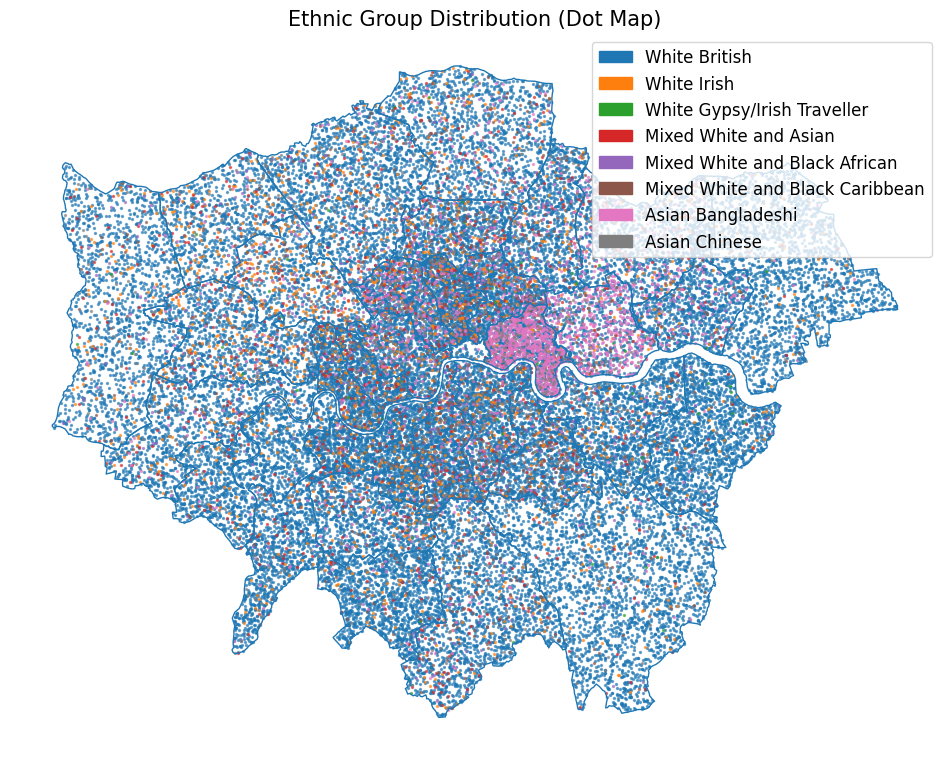

In [12]:
def random_point_in_polygon(polygon):
    minx, miny, maxx, maxy = polygon.bounds
    while True:
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        point = Point(x, y)
        if polygon.contains(point):
            return x, y

geo_df = gpd.read_file('london_421.geojson')
geo_df = geo_df.rename(columns={'name': 'local authority name'})
merged_data = geo_df.merge(grouped_data, on='local authority name', how='left')

ethnic_columns = grouped_data.columns[:-1]
ethnic_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

fig, ax = plt.subplots(figsize=(12, 12))
sampling_factor = 0.01

for borough, row in merged_data.iterrows():
    for ethnic_group, color in zip(ethnic_columns, ethnic_colors):
        population = row[ethnic_group]
        if population > 0:
            borough_geom = row['geometry']
            num_points = int(population * sampling_factor)
            points = []
            for _ in range(num_points):
                x, y = random_point_in_polygon(borough_geom)
                points.append((x, y))
            points = np.array(points)
            if points.size > 0:
                ax.scatter(points[:, 0], points[:, 1], color=color, alpha=0.6, s=2)

geo_df.boundary.plot(ax=ax, linewidth=1)
ax.set_title('Ethnic Group Distribution (Dot Map)', fontsize=15)
plt.axis('off')

legend_labels = ethnic_columns
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(ethnic_colors, legend_labels)]
ax.legend(handles=legend_patches, loc='upper right', fontsize=12)

plt.show()


### 5. Code Section (Schelling Model)

In [13]:

from shapely.geometry import Point, Polygon, box
import matplotlib.colors as mcolors
from openpyxl import load_workbook

In [14]:
# Load London's geographic boundary (GeoJSON or shapefile)
london_boundary = gpd.read_file("london_421.geojson")  # Replace with full London boundary
boundary_polygon = london_boundary.geometry.union_all()
city_of_london = london_boundary[london_boundary['name'] == 'City of London'].geometry.union_all()

groups = {
    "White British": 0,
    "White Irish": 1,
    "White Gypsy/Irish Traveller": 2,
    "White Roma": 3,
    "White Other": 4,
    "Mixed White and Asian": 5,
    "Mixed White and Black African": 6,
    "Mixed White and Black Caribbean": 7,
    "Mixed Other": 8,
    "Asian Bangladeshi": 9,
    "Asian Chinese": 10,
    "Asian Indian": 11,
    "Asian Pakistani": 12,
    "Asian Other": 13,
    "Black African": 14,
    "Black Caribbean": 15,
    "Black Other": 16,
    "Other Arab": 17,
    "Other Any other": 18
}

In [15]:
df = pd.read_excel("Ethnic group.xlsx", sheet_name="2011", engine='openpyxl')
df

ward code                    ward name local authority code  \
0    E09000001  City of London (aggregated)            E09000001   
1    E05014053                        Abbey            E09000002   
2    E05014054                       Alibon            E09000002   
3    E05014055            Barking Riverside            E09000002   
4    E05014056                         Beam            E09000002   
..         ...                          ...                  ...   
675  E05013805                Regent's Park            E09000033   
676  E05013806                   St James's            E09000033   
677  E05013807               Vincent Square            E09000033   
678  E05013808                     West End            E09000033   
679  E05013809                   Westbourne            E09000033   

     local authority name  All usual residents  White British  White Irish  \
0          City of London                 7375           4243          180   
1    Barking and Dagenham                 3325            496           25   
2    Barking and Dagenham                 8926           5156           79   
3    Barking and Dagenham                 5793           1961           26   
4    Barking and Dagenham                 7654           3576          137   
..                    ...                  ...            ...          ...   
675           Westminster                13811           4369          210   
676           Westminster                10247           4621          249   
677           Westminster                10569           4846          206   
678           Westminster                13072           4637          286   
679           Westminster                11746           2932          390   

     White Gypsy/Irish Traveller  Unnamed: 8  White Other  ...  \
0                              3         NaN         1373  ...   
1                              4         NaN          494  ...   
2                              3         NaN          700  ...   
3                             10         NaN          432  ...   
4                              0         NaN          730  ...   
..                           ...         ...          ...  ...   
675                           10         NaN         3512  ...   
676                            3         NaN         2413  ...   
677                            7         NaN         2425  ...   
678                            3         NaN         3754  ...   
679                            3         NaN         2040  ...   

     Asian Bangladeshi  Asian Chinese  Asian Indian  Asian Pakistani  \
0                  232            263           216               16   
1                  144            104           701              315   
2                  273             71           173              104   
3                  298             45           157              167   
4                  187             43           247               93   
..                 ...            ...           ...              ...   
675                156            464          1164              223   
676                156            656           254               81   
677                272            274           256               77   
678                233            603           569               93   
679                657            158           262               89   

     Asian Other  Black African  Black Caribbean  Black Other  Other Arab  \
0            213             98               46           49          69   
1            161            503               81           40          23   
2            230           1455              206           94          31   
3            183           1684              236          174          30   
4            123           1598              271          191          22   
..           ...            ...              ...          ...         ...   
675          976            389               99      

In [16]:
df = df.drop(columns=['ward code', 'ward name', 'local authority code', 'local authority name', 'All usual residents', 'Unnamed: 8'])
df

White British  White Irish  White Gypsy/Irish Traveller  White Other  \
0             4243          180                            3         1373   
1              496           25                            4          494   
2             5156           79                            3          700   
3             1961           26                           10          432   
4             3576          137                            0          730   
..             ...          ...                          ...          ...   
675           4369          210                           10         3512   
676           4621          249                            3         2413   
677           4846          206                            7         2425   
678           4637          286                            3         3754   
679           2932          390                            3         2040   

     Mixed White and Asian  Mixed White and Black African  \
0                      111                             37   
1                       35                             50   
2                       54                             94   
3                       35                             91   
4                       31                             98   
..                     ...                            ...   
675                    271                             84   
676                    155                             74   
677                    131                            125   
678                    216                             78   
679                    174                            150   

     Mixed White and Black Caribbean  Mixed Other  Asian Bangladeshi  \
0                                 38          103                232   
1                                 26           35                144   
2                                 86           62                273   
3                                 96           82                298   
4                                107           60                187   
..                               ...          ...                ...   
675                               47          219                156   
676                               56          151                156   
677                               88          137                272   
678                               84          262                233   
679                              189          292                657   

     Asian Chinese  Asian Indian  Asian Pakistani  Asian Other  Black African  \
0              263           216               16          213             98   
1              104           701              315          161            503   
2               71           173              104          230           1455   
3               45           157              167          183           1684   
4               43           247               93          123           1598   
..             ...           ...              ...          ...            ...   
675            464          1164              223          976            389   
676            656           254               81          421            342   
677            274           256               77          421            532   
678            603           569               93          598            365   
679            158           262               89          505           1030   

     Black Caribbean  Black Other  Other Arab  Other Any other  
0                 46           49          69               85  
1                 81           40          23               89  
2                206           94          31               55  
3                236          174          30               88  
4                271          191          22              139  
..               ...          ...         ...              ...  
675               99           85         977         

In [17]:
tot_pop = df.sum(axis=0)
tot_pop

White British                      3669279
White Irish                         175990
White Gypsy/Irish Traveller           8194
White Other                        1033969
Mixed White and Asian               101512
Mixed White and Black African        65485
Mixed White and Black Caribbean     119424
Mixed Other                         118873
Asian Bangladeshi                   222132
Asian Chinese                       124258
Asian Indian                        542865
Asian Pakistani                     223798
Asian Other                         398511
Black African                       573921
Black Caribbean                     344597
Black Other                         170121
Other Arab                          106032
Other Any other                     175023
dtype: int64

In [18]:
pop = tot_pop.sum()
pop_f = tot_pop/pop
group_ratios = list(pop_f) 

<Figure size 1000x1000 with 0 Axes>

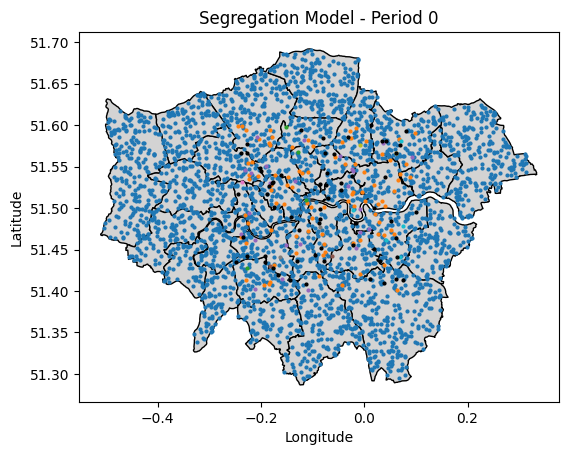

<Figure size 1000x1000 with 0 Axes>

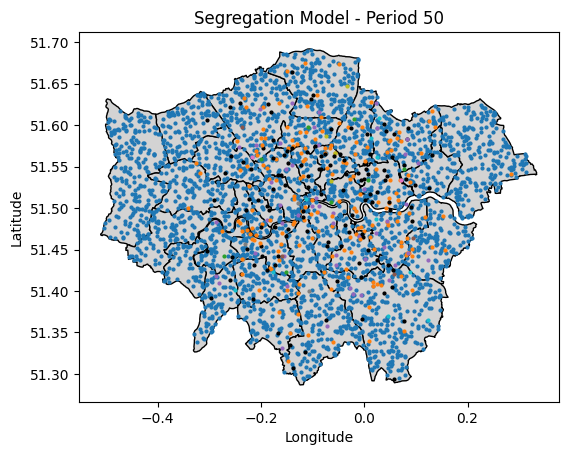

<Figure size 1000x1000 with 0 Axes>

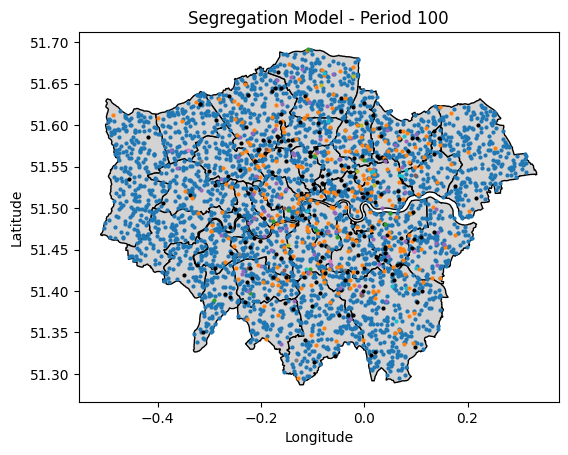

<Figure size 1000x1000 with 0 Axes>

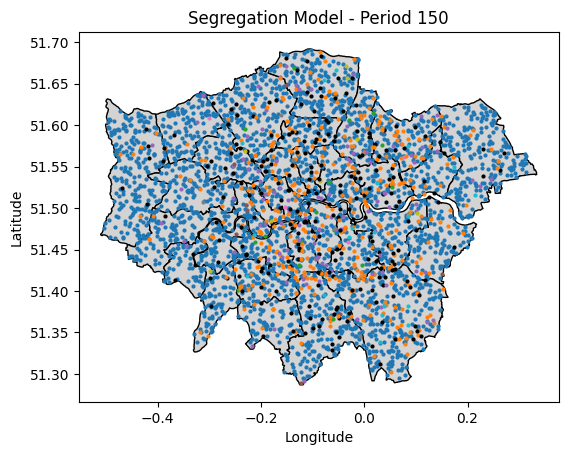

<Figure size 1000x1000 with 0 Axes>

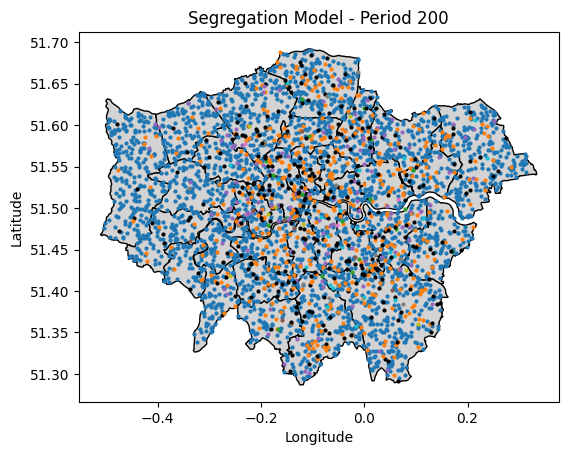

<Figure size 1000x1000 with 0 Axes>

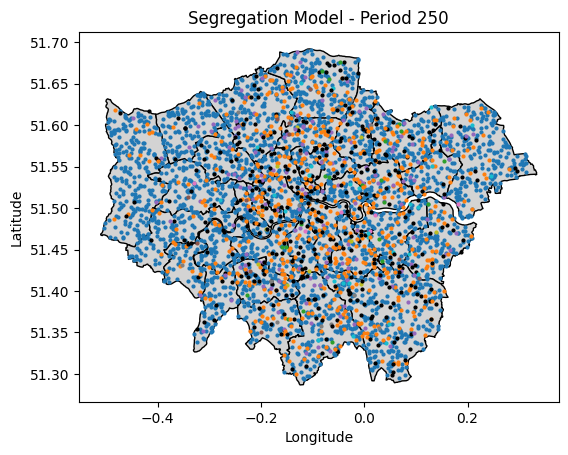

<Figure size 1000x1000 with 0 Axes>

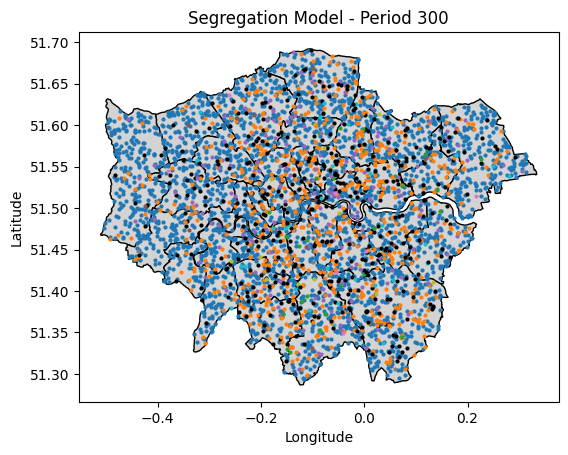

<Figure size 1000x1000 with 0 Axes>

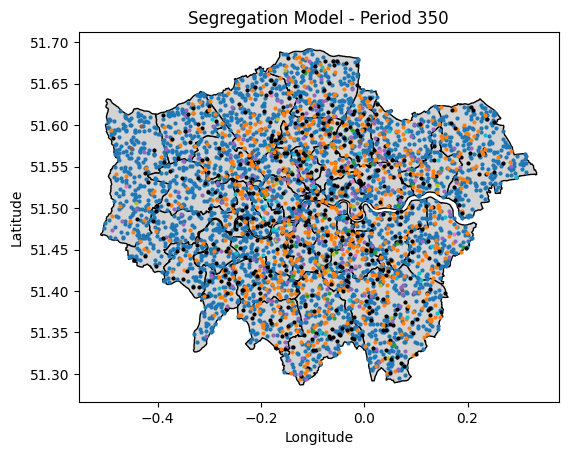

<Figure size 1000x1000 with 0 Axes>

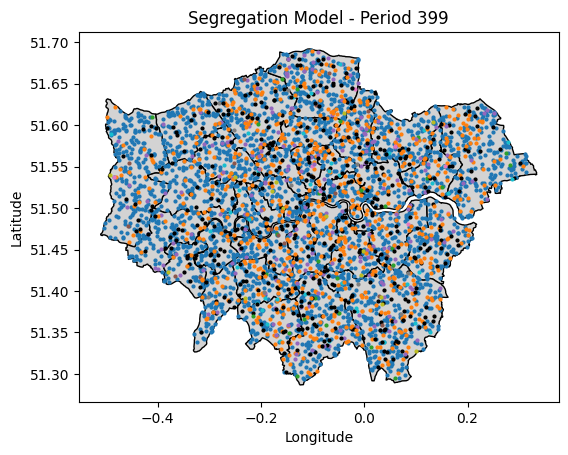

In [19]:
from rtree import index

# Define the bounding box for metropolitan London (approximate)
london_metropolitan = box(-0.25, 51.40, 0.1, 51.60)  # WGS 84 coordinates

num_agents = 5000
general_satisfaction_threshold = 0.4
city_of_london_satisfaction_threshold = 0.3
num_periods = 400
initial_agents = 3000  # Start with only native whites (agent_type 0)
new_agents_per_period = 200  # Number of new agents to add each period

def initialize_native_population(count):
    agents = []
    for _ in range(count):
        while True:
            x, y = random.uniform(boundary_polygon.bounds[0], boundary_polygon.bounds[2]), \
                   random.uniform(boundary_polygon.bounds[1], boundary_polygon.bounds[3])
            point = Point(x, y)
            if boundary_polygon.contains(point):  # Ensure within the boundary of London
                agents.append((0, point))  # Native population is agent 0
                break
    return agents

def initialize_new_migrants(count, groups, metropolitan_polygon):
    agents = []
    for group, ratio in zip(groups.values(), group_ratios):
        group_count = int(ratio * count)
        for _ in range(group_count):
            while True:
                x, y = random.uniform(metropolitan_polygon.bounds[0], metropolitan_polygon.bounds[2]), \
                       random.uniform(metropolitan_polygon.bounds[1], metropolitan_polygon.bounds[3])
                point = Point(x, y)
                if metropolitan_polygon.contains(point):  # Ensure within the metropolitan area
                    agents.append((group, point))
                    break
    return agents

# Function to initialize R-tree index
def build_rtree_index(agents):
    rtree_index = index.Index()
    for idx, agent in enumerate(agents):
        rtree_index.insert(idx, agent[1].bounds)  # Insert agent’s bounding box into R-tree
    return rtree_index

#R-tree is a tree data structure used for storing spatial data indexes in an efficient manner. R-trees are highly useful for spatial data queries and storage.


# Modified is_satisfied function using R-tree
def is_satisfied(agent, agents, rtree_idx, radius=0.05):
    agent_type, agent_location = agent
    nearby_agents_idx = list(rtree_idx.intersection(agent_location.buffer(radius).bounds))
    # Filter valid indices to avoid IndexError
    valid_neighbors = [agents[idx] for idx in nearby_agents_idx if idx < len(agents)]
    similar_neighbors = sum(1 for neighbor in valid_neighbors if neighbor[0] == agent_type)

    # Apply different threshold if agent is in 'City of London'
    threshold = city_of_london_satisfaction_threshold if city_of_london.contains(agent_location) else general_satisfaction_threshold
    return len(valid_neighbors) > 0 and (similar_neighbors / len(valid_neighbors)) >= threshold

#Sets higher satisfaction for city of london


# Move unsatisfied agents with R-tree support
def move_unsatisfied_agents(agents, rtree_idx):
    for i, agent in enumerate(agents):
        if not is_satisfied(agent, agents, rtree_idx):
            j = 0
            while j<50:
                j+=1
                move_x, move_y = random.uniform(-0.02, 0.02), random.uniform(-0.02, 0.02)
                new_location = Point(agent[1].x + move_x, agent[1].y + move_y)
                if boundary_polygon.contains(new_location):  # Ensure new location is within London
                    agents[i] = (agent[0], new_location)
                    rtree_idx.delete(i, agent[1].bounds)  # Remove old location
                    rtree_idx.insert(i, new_location.bounds)  # Insert new location
                    break

# Color map for visualization
colors = list(mcolors.TABLEAU_COLORS.keys())[:19]
color_map = {i: mcolors.TABLEAU_COLORS[color] for i, color in enumerate(colors)}

# Visualization function to plot agents
def plot_agents(agents, period):
    plt.figure(figsize=(10, 10))
    london_boundary.plot(color="lightgrey", edgecolor="black")
    for group, location in agents:
        plt.plot(location.x, location.y, 'o', color=color_map.get(group, 'black'), markersize=2)
    plt.title(f'Segregation Model - Period {period}')
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()


agents = initialize_native_population(initial_agents)
del groups['White British']
rtree_idx = build_rtree_index(agents)
# Run simulation with updated R-tree for each period
for period in range(num_periods):
    move_unsatisfied_agents(agents, rtree_idx)

    # Add new agents each period within the metropolitan area
    if period%50 == 0:
        new_migrants = initialize_new_migrants(new_agents_per_period, groups, london_metropolitan)
        agents.extend(new_migrants)
        agents = agents[:num_agents]
        rtree_idx = build_rtree_index(agents) 
        
    if period % 50 == 0 or period == num_periods - 1:
        plot_agents(agents, period)

#Here you can see agents are being added for each 50 periods.

In [21]:
# for period in range(num_periods):
#     move_unsatisfied_agents(agents, rtree_idx)

#     # Add new agents each period within the metropolitan area
#     if period%50 == 0:
#         new_migrants = initialize_new_migrants(new_agents_per_period, groups, london_metropolitan)
#         agents.extend(new_migrants)
#         agents = agents[:num_agents]
#         rtree_idx = build_rtree_index(agents) 
        
#     if period % 50 == 0 or period == num_periods - 1:
#         plot_agents(agents, period)


### 6. Results / Interpretation

#### Section 6a

#### Introduction

London, as one of the world’s most ethnically diverse cities, has undergone significant demographic changes over the past several decades, driven by immigration, economic restructuring, and evolving housing policies. With distinct ethnic communities forming in different parts of the city, London’s residential patterns reflect broader shifts in economic opportunities, social integration, and migration trends. However, these changes have also brought challenges in terms of residential segregation, where certain ethnic groups become concentrated within specific neighborhoods. This phenomenon has long intrigued sociologists, urban planners, and economists, particularly as it raises questions about social cohesion, access to resources, and the potential for either integration or further separation between communities (Peach, 1996; Johnston, Poulsen, & Forrest, 2007).

In our project, we have tried to utilize and combine the twin concepts of the Urban Schelling Model and Agent-Based Modeling to develop a model that analyzes ethnic spatial segregation in London over decades’ worth of time.

The Schelling model of segregation, introduced by economist Thomas Schelling in the 1970s, provides a fundamental framework for understanding residential segregation through the dynamics of individual preferences and small-scale decision-making. Schelling’s model uses a simple, yet powerful approach, illustrating how even slight preferences for neighbors of similar ethnic backgrounds can lead to pronounced segregation patterns over time (Schelling, 1971). By modeling individual preferences and “tipping points,” Schelling demonstrated how microscopic decisions at the individual or household level can have large-scale implications for spatial segregation. In the context of London’s evolving ethnic neighborhoods, the Schelling model offers insight into the persistence of ethnic clustering and the role of preferences and tolerance thresholds in shaping residential outcomes over the decades (Clark & Fossett, 2008).

Agent-based models (ABMs), a more advanced computational tool, have emerged as a significant extension of Schelling’s foundational ideas. ABMs allow for the simulation of complex interactions between heterogeneous agents, capturing the diversity of motivations, constraints, and social dynamics that influence individual residential choices (Epstein & Axtell, 1996). Unlike Schelling's relatively simple binary model, ABMs offer flexibility to include a broader range of factors, such as economic pressures, housing policies, and social networks, that may affect segregation patterns. In examining London’s changing ethnic landscape, ABMs can simulate various scenarios, like economic shocks or changes in migration policies, offering a nuanced view of how these forces influence residential segregation trends across time (Bruch & Mare, 2006).

#### Literature Review

The literature on ethnic residential segregation in cities has long sought to understand the complex patterns and driving forces behind the clustering of ethnic communities within urban areas. London, as one of the most ethnically diverse cities globally, provides a unique case for studying how individual and collective behaviors influence neighborhood formation and change over time. London’s ethnic diversity stands apart from the rest of the UK, with a significantly higher proportion of neighborhoods in the top two diversity quintiles (Sturgis, Brunton-Smith, Kuha, & Jackson, 2013). As ethnic diversity increases, so too does the complexity of its residential geographies. While urban diversity dominates the UK, suburban and rural areas have also seen modest growth in ethnic minority populations (Catney, 2016a).

While researching behavioral aspects of individual preferences that influence residential decisions as per Schelling’s Model, we found it challenging to pinpoint the exact ‘behavior’. Segregation is often evident in urban areas, with clusters of economic and residential groups based on ethnicity and social class. Quantifying neighborhood segregation (e.g., Reardon & O’Sullivan, 2004) reveals little about the behavior behind it.

Some studies highlighted various other influencing factors:

- Increased inter-racial tolerance (Storm, Sobolewska, & Ford, 2020)
- Internal migration trends across life stages (Coulter, van Ham, & Findlay, 2016; Finney, 2011)
- Direct immigration flows to non-metropolitan destinations due to low-skilled labor demand (Jentsch, De Lima, & MacDonald, 2007) and asylum seeker dispersal policies (Hynes & Sales, 2010).

On studies based on Schelling’s Model, we found no concrete consensus. To summarize:

- Segregation emerges even with mild preferences for demographic similarity (Clark, 1991).
- Segregation becomes noticeable only when it is well underway, making it hard to reconstruct its chronology (Batty et al., 2004).
- Schelling (1971) demonstrated that segregation could emerge with mild preferences; this has been supported (Clark, 1991) but also criticized (Massey & Denton, 1993).

ABM-based studies often extend Schelling’s insights, examining various neighborhood shapes and sizes, which impact segregation outcomes:

- Larger neighborhoods took longer to stabilize, producing more extreme segregation patterns (O’Sullivan et al., 2003; Fossett & Waren, 2005).
- Studies explored socioeconomic inequality and cultural preferences within ethnic populations (Fossett & Senft, 2004; Bruch, 2006).
- Some used individual census records and GIS data to model residential segregation (Benenson et al., 2002).

We also found indices for measuring neighborhood ethnic composition, such as the Hirschman (1964) concentration index and Theil’s Multigroup Entropy Index (Sturgis, Brunton-Smith, Kuha, & Jackson).

Combining insights from the studies reviewed, we developed our model approach:

#### References

- Schelling, T. C. (1971). Dynamic models of segregation. Journal of Mathematical Sociology, 1(2), 143-186.
- Clark, W. A. V., & Fossett, M. (2008). Understanding the social context of residential segregation. Demography, 45(2), 497-514.
- Epstein, J. M., & Axtell, R. (1996). Growing artificial societies: Social science from the bottom up. MIT Press.
- Bruch, E. E., & Mare, R. D. (2006). Neighborhood choice and neighborhood change. American Journal of Sociology, 112(3), 667-709.
- Peach, C. (1996). Does Britain have ghettos? Transactions of the Institute of British Geographers, 21(1), 216-235.
- Johnston, R., Poulsen, M., & Forrest, J. (2007). Ethnic and social segregation: Understanding the dynamics of London’s diverse neighborhoods. Urban Studies, 44(12), 2379-2400.
- Sturgis, P., Brunton-Smith, I., Kuha, J., & Jackson, J. (2013). Ethnic diversity, segregation, and the social cohesion of neighborhoods in London. Ethnic and Racial Studies, 36(2), 127-150.
- Catney, G. (2016a). The changing geographies of ethnic diversity in England and Wales, 1991-2011. Population, Space and Place, 22(8), 750-765.
- Reardon, S. F., & O’Sullivan, D. (2004). Measures of spatial segregation. Sociological Methodology, 34(1), 121-162.
- Storm, I., Sobolewska, M., & Ford, R. (2020). Is ethnic diversity always bad for social capital? Comparative Political Studies, 53(13), 1890-1922.
- Coulter, R., van Ham, M., & Findlay, A. M. (2016). Rethinking residential mobility: Linking lives through time and space. Progress in Human Geography, 40(3), 352-374.
- Finney, N. (2011). Ethnic differences in young adult migration within Britain. Transactions of the Institute of British Geographers, 36(3), 455-470.
- Jentsch, B., De Lima, P., & MacDonald, B. (2007). Migrant workers in rural Scotland. International Journal of Multicultural Societies, 9(1), 35-53.
- Hynes, P., & Sales, R. (2010). New communities: Asylum seekers and dispersal. Ethnic and Racial Studies, 33(3), 546-563.
- Clark, W. A. V. (1991). Residential preferences and neighborhood racial segregation. Demography, 28(1), 1-19.
- Batty, M., et al. (2004). Visualizing urban structure and function: The case of London. Computers, Environment, and Urban Systems, 28(3), 167-203.
- Massey, D. S., & Denton, N. A. (1993). American apartheid: Segregation and the making of the underclass. Harvard University Press.
- Fossett, M. A. (2006). Ethnic preferences and residential segregation. Journal of Mathematical Sociology, 30(3-4), 185-273.
- Flache, A., & Hegselmann, R. (2001). Do irregular grids affect social dynamics? Journal of Artificial Societies and Social Simulation, 4(4).
- O’Sullivan, D., Macgill, J., & Yu, C. (2003). Agent-based residential segregation. Environment and Planning B, 30(1), 27-48.
- Fossett, M. A., & Waren, W. (2005). Implications of ethnic preferences in ABMs. Urban Studies, 42(11), 1893-1917.
- Benenson, I., Omer, I., & Hatna, E. (2002).


#### Section 6b

### Reasons for Ethnic Concentration in Central London

#### Historical Settlement Patterns
Following World War II, London saw significant immigration from former colonies, resulting in ethnic communities establishing roots in the city’s inner boroughs. Historical migration waves, as noted by **Peach (2009)**, show that postcolonial migrants initially settled in affordable, inner-city areas, forming ethnic enclaves that provided social support and cultural familiarity. Examples include the Bangladeshi population in Tower Hamlets and the Black Caribbean community in Southwark. **Portes and Manning (1986)** describe how immigrant populations often cluster in regions that support social networks and cultural continuity, usually close to affordable housing and employment.

#### Economic Opportunities
Ethnic minorities in Central London tend to concentrate around economic opportunities in sectors like retail, hospitality, and public services, where immediate job prospects exist without high educational requirements (**Hamnett, 1998**). Boroughs such as Newham and Hackney, with more affordable housing, attract lower-income households due to limited options elsewhere. **Sassen’s (2001)** concept of "global cities" explains how a dual economy—with both high-paying corporate jobs and lower-wage service roles—contributes to immigrant clustering in economically viable, low-cost urban areas.

#### Gentrification and Housing Constraints
Gentrification, particularly in boroughs like Hackney, creates complex housing dynamics where rising property values force displacement but retain ethnic communities close to the city center for work proximity and due to limited affordable housing in outer areas (**Lees, Slater, & Wyly, 2008**). Housing market constraints further limit residential mobility for minority groups, leading to continued concentration in inner-city neighborhoods. **Logan and Molotch’s (1987)** "Growth Machine Theory" highlights how urban redevelopment policies marginalize low-income ethnic communities, exacerbating spatial segregation.

---

### Theories Explaining White Population Dispersion

#### White Flight and White Avoidance
White Flight and White Avoidance theories provide insight into the dispersion of the White British population. White Flight, especially noted during the 1970s and 1980s, refers to the outmigration of White residents from urban centers as these areas became more ethnically diverse (**Duncan & Duncan, 1957**). White Avoidance reflects a preference for suburban or rural areas with less ethnic diversity, influenced by social and cultural preferences for homogeneity and lower population density (**Johnston et al., 2007**).

#### Socioeconomic Mobility and Residential Choices
Socioeconomic mobility among White British residents, supported by income stability and economic resources, allows for residential choices in suburban and rural areas, which offer amenities like larger homes, green spaces, and a perception of safety (**Savage et al., 2005**). **Massey and Denton’s (1993)** work on "American Apartheid" illustrates how socioeconomic resources enable greater residential flexibility, often resulting in self-segregation by income and class that aligns with ethnic divides.

---

### Bangladeshi Population Concentration in London

#### Historical Settlement and Community Building
The 1970s brought a significant influx of Bangladeshi immigrants, who primarily settled in Tower Hamlets due to affordable housing and job availability. This area developed into a cultural hub, with resources like mosques, shops, and community centers that reinforced its role as a central location for Bangladeshi residents (**Phillips, 2006**). **Waldinger and Lichter (2003)** explain through ethnic enclave theory that social capital within these communities strengthens economic resilience and cultural identity, fostering geographic concentration.

#### Economic and Housing Constraints
Economic limitations are a major factor in the continued residential clustering of Bangladeshi families. Lower income levels limit housing choices, confining families to affordable, high-density inner-city areas. Reliance on public housing in Tower Hamlets and restricted access to the private housing market reduce residential mobility, consistent with **Rex and Moore’s (1967)** "Race, Community, and Conflict," which discusses how systemic housing inequality perpetuates ethnic concentration in urban areas.

---

### Indian Population Concentration & Dispersion in London

#### Historical Settlement and Cultural Infrastructure
Indian immigrants who arrived in the 1960s and 1970s initially settled in affordable west London boroughs like Brent, Harrow, and Southall, forming vibrant communities with strong cultural infrastructure including temples, cultural centers, and businesses (**Peach, 2005**). These areas became prominent Indian cultural hubs, as explained by **Breton’s (1964)** "institutional completeness" framework, which highlights how networks of social and religious services attract and maintain ethnic populations in specific locations.

#### Socioeconomic Mobility and Housing Choices
In contrast to some other minority groups, many Indian families have achieved higher socioeconomic mobility, enabling them to move from densely populated areas to suburban neighborhoods. This economic advancement allows broader housing choices and contributes to dispersion across inner and outer boroughs of London. These patterns align with **assimilation theory (Alba & Nee, 1997)**, which posits that increased economic stability allows ethnic groups to integrate more broadly into society, facilitating residential dispersion over time.

---

### References

- **Alba, R., & Nee, V.** (1997). *Rethinking assimilation theory for a new era of immigration*. International Migration Review, 31(4), 826–874.
- **Breton, R.** (1964). *Institutional completeness of ethnic communities and the personal relations of immigrants*. American Journal of Sociology, 70(2), 193-205.
- **Duncan, O. D., & Duncan, B.** (1957). *The Negro population of Chicago: A study of residential succession*. University of Chicago Press.
- **Hamnett, C.** (1998). *Social polarization, economic restructuring and welfare state regimes*. Urban Studies, 35(9), 1409–1430.
- **Johnston, R., Poulsen, M., & Forrest, J.** (2007). *The geography of ethnic residential segregation: A comparative study of five countries*. Annals of the Association of American Geographers, 97(4), 713–738.
- **Lees, L., Slater, T., & Wyly, E.** (2008). *Gentrification*. Routledge.
- **Logan, J. R., & Molotch, H.** (1987). *Urban fortunes: The political economy of place*. University of California Press.
- **Massey, D. S., & Denton, N. A.** (1993). *American apartheid: Segregation and the making of the underclass*. Harvard University Press.
- **Peach, C.** (2005). *The ghetto and the ethnic enclave*. In D. Varady (Ed.), Desegregating the City: Ghettos, Enclaves, and Inequality (pp. 31–48). SUNY Press.
- **Peach, C.** (2009). *Slippery segregation: Discovering or manufacturing ghettos?* Journal of Ethnic and Migration Studies, 35(9), 1381-1395.
- **Phillips, D.** (2006). *Parallel lives? Challenging discourses of British Muslim self-segregation*. Environment and Planning D: Society and Space, 24(1), 25–40.
- **Portes, A., & Manning, R. D.** (1986). *The immigrant enclave: Theory and empirical examples*. In S. Olzak & J. Nagel (Eds.), Competitive ethnic relations (pp. 47-68). Academic Press.
- **Rex, J., & Moore, R.** (1967). *Race, community, and conflict: A study of Sparkbrook*. Oxford University Press.
- **Sassen, S.** (2001). *The global city: New York, London, Tokyo*. Princeton University Press.
- **Savage, M., Barlow, J., Dickens, P., & Fielding, T.** (2005). *Globalization and belonging*. Sage.
- **Waldinger, R., & Lichter, M. I.** (2003). *How the other half works: Immigration and the social organization of labor*. University of California Press.


### 7. Discussion


**Consideration of 'White-Flight' in the Model**

During the presentation, the idea of implementing "White-Flight" was discussed. However, based on the data, we observe that while the population of certain groups, such as White British, has indeed declined from 1910 to 2021, the community as a whole has not vanished. Thus, directly removing agents would not accurately represent these demographic shifts. Furthermore, as the model progresses through multiple periods with parameters updated at regular intervals, it naturally accounts for changing population percentages over time.

**Applicability to Other Cities**

This model could also be tested with data from other cities. For example, we explored the possibility of applying it to Bangalore, where agents would represent different income groups rather than racial groups. However, we couldn't proceed due to insufficient data for accurate modeling.

**Model Efficiency Improvements**

We have successfully optimized the Schelling model by reducing the total number of agents to represent the population effectively. As mentioned in the presentation, our previous model required approximately three hours to run just 36 periods. With the recent optimizations, we can now run the model for more periods, yielding better and faster results.

The older version, i.e. the one shown in the presentaion and the updated model outputs are as shown below. Note the dot plot based on the actual data is generated above. Adding it below for easier comparision

THe schelling model code takes around 66 mins to run on a Intel i5 | 8GB RAM laptop


<img title="Model output v1" alt="Unimporved model, the plot shown during presentation" src="seggregation_plot_prepresentation.png">

<img title="Model output v2" alt="Imporved model" src="seggregation_plot_postpresentation.png">

<img title="Dot plot" alt="Dot plot based on the actual data" src="Dot_plot_2021.png">

### Individual Contribution 




**Atharva Mandar Phatak | BE21B009**

a. Selection of London as the case study for analyzing segregation and formulating the problem statement to replicate and compare segregation patterns with actual census data.

b. Responsible for cleaning and preparing the population data, creating visualizations such as pie charts and dot plots, and interpreting demographic insights.

c. Coded initial parts of the Schelling model, specifically implementing elements outlined in points **b** (addition of agent types) and **d** (London map integration) from the model modifications section.

d. Report Writing  

Section wise contribution: Section 1, 2, 3 (b) and (d), 4, 7 

**G.R Chetan Reddy | BE21B015**

a. Contributed by implementing code to run the simulation and to add new agents after specific periods.

b. Suggested introducing gaps before adding new agents, allowing previous agents to segregate effectively.
c. Modified the code to implement the simulation using an R-tree data structure, enhancing speed and enabling longer simulation periods.

d. Collected census data for London for the years 2021, 2011, 2001, and 1961.

e. Census data for the years 1991, 1981, and 1971 was unavailable.

Section wise contribution: Section 3 (a) and (c) and data collection


**Srijani | HS23H064**

a. Interpetation of the results and relating it to public policy changes

Section wise contribution: Section 6 (b)





**Ambalika | HS23H043**

a. Researched articles and papers on Residential Segregation, Migration, and Income Segregation in Bangalore, focusing on changes post-1990s liberalization and the software boom.
    
b. Collected Bangalore census data with a focus on:
        Migration patterns
        Religion-based segregation
        District-wise population (born and enumerated)
        Decadal population variations since 1901.

c. Upon selecting London due to data limitations for Bangalore, conducted extensive research to understand London’s history and demographic diversity, including:
        The impact of migration on ethnic residential segregation
        Housing policies that influence segregation patterns
        Studies using the Schelling Model and Agent-Based Models for spatial segregation analysis.
    Reviewed literature on London’s ethnic and migration history to deepen understanding of the selected problem.

Section wise contribution: Section 6 (a) 